# Mount google drive, download libraries, get data

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# downloading necessary libraries
import pandas as pd
import re
from pandas import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

<ipython-input-2-6fd760a0f380>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime as dt


In [ ]:
DL_nbbo_aapl_agg_min_2022_filtered = '/content/drive/MyDrive/ucl_diss/Code_new/data_DL/DL_nbbo_aapl_agg_min_2022_filtered.csv'
DL_nbbo_aapl_agg_min_2022_filtered = pd.read_csv(DL_nbbo_aapl_agg_min_2022_filtered)

In [ ]:
DL_nbbo_aapl_agg_min_2022_filtered.isna().any().any()

False

In [ ]:
DL_nbbo_aapl_agg_min_2022_filtered

,Unnamed: 0,Bid-price Open,Ask-price Open,Bid-price High,Ask-price High,Bid-price Low,Ask-price Low,Bid-price Close,Ask-price Close,Bid-size,Ask-size,Quotes-count,Year,Bid-Ask Spread Close,Mid-Price Close,Order Imbalance,Intraday Returns,Volatility
0,1225.5,178.185000,178.210833,178.185000,178.213333,178.180000,178.209167,178.180000,178.211667,3.250000,5.250000,2.250000,2022.0,0.031667,178.195833,-2.000000,1.443423e-09,0.000095
1,1237.0,178.154545,178.186364,178.154545,178.186364,178.145455,178.177273,178.146364,178.178182,6.818182,10.090909,3.636364,2022.0,0.031818,178.162273,-3.272727,-5.612603e-05,0.000094
2,1246.5,178.106250,178.160000,178.108750,178.160000,178.103750,178.153750,178.107500,178.158750,6.000000,3.500000,2.500000,2022.0,0.051250,178.133125,2.500000,4.210684e-05,0.000094
3,1255.0,178.128889,178.172222,178.130000,178.177778,178.127778,178.170000,178.128889,178.175556,4.000000,4.111111,2.666667,2022.0,0.046667,178.152222,-0.111111,1.871231e-05,0.000094
4,1261.0,178.170000,178.226667,178.170000,178.230000,178.170000,178.223333,178.170000,178.226667,2.333333,3.333333,2.333333,2022.0,0.056667,178.198333,-1.000000,1.870794e-05,0.000095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520226,560600.5,128.419000,128.429833,128.422500,128.433500,128.415333,128.426167,128.418333,128.430000,329.116667,285.966667,44.500000,2022.0,0.011667,128.424167,43.150000,-2.593199e-06,0.000064
520227,560659.0,128.394211,128.405263,128.397368,128.407895,128.390175,128.401404,128.392807,128.404912,264.789474,261.385965,36.807018,2022.0,0.012105,128.398860,3.403509,-9.561856e-06,0.000063
520228,560716.0,128.360526,128.370526,128.362281,128.372456,128.359298,128.369298,128.360351,128.370702,211.736842,160.105263,22.982456,2022.0,0.010351,128.365526,51.631579,8.516696e-10,0.000063
520229,560773.5,128.401207,128.412069,128.406552,128.417241,128.397069,128.407931,128.400690,128.412586,334.000000,365.758621,47.310345,2022.0,0.011897,128.406638,-31.758621,2.561760e-09,0.000063


# Feature Engineering

In [ ]:
# lagged features

lags = [1, 5, 10]  # example lags in minutes
for lag in lags:
    for col in ['Bid-Ask Spread Close', 'Bid-price Open', 'Ask-price Open', 'Bid-price Close', 'Ask-price Close']:
        DL_nbbo_aapl_agg_min_2022_filtered[f"{col}_lag_{lag}"] = DL_nbbo_aapl_agg_min_2022_filtered[col].shift(lag)

# rolling statistics

windows = [5, 10, 30]  # example windows in minutes
for window in windows:
    for col in ['Bid-Ask Spread Close', 'Bid-price Open', 'Ask-price Open', 'Bid-price Close', 'Ask-price Close']:
        DL_nbbo_aapl_agg_min_2022_filtered[f"{col}_rolling_mean_{window}"] = DL_nbbo_aapl_agg_min_2022_filtered[col].rolling(window=window).mean()
        DL_nbbo_aapl_agg_min_2022_filtered[f"{col}_rolling_std_{window}"] = DL_nbbo_aapl_agg_min_2022_filtered[col].rolling(window=window).std()

# technical indicators

DL_nbbo_aapl_agg_min_2022_filtered['SMA_5'] = DL_nbbo_aapl_agg_min_2022_filtered['Mid-Price Close'].rolling(window=5).mean()
DL_nbbo_aapl_agg_min_2022_filtered['SMA_10'] = DL_nbbo_aapl_agg_min_2022_filtered['Mid-Price Close'].rolling(window=10).mean()

# spread features
DL_nbbo_aapl_agg_min_2022_filtered['Spread_Percentage'] = (DL_nbbo_aapl_agg_min_2022_filtered['Ask-price Close'] - DL_nbbo_aapl_agg_min_2022_filtered['Bid-price Close']) / DL_nbbo_aapl_agg_min_2022_filtered['Mid-Price Close']

# feature interactions

DL_nbbo_aapl_agg_min_2022_filtered['Bid_Ask_Size_Interaction'] = DL_nbbo_aapl_agg_min_2022_filtered['Bid-size'] * DL_nbbo_aapl_agg_min_2022_filtered['Ask-size']
DL_nbbo_aapl_agg_min_2022_filtered['Bid_Ask_Price_Interaction'] = DL_nbbo_aapl_agg_min_2022_filtered['Bid-price Close'] * DL_nbbo_aapl_agg_min_2022_filtered['Ask-price Close']




DL_nbbo_aapl_agg_min_2022_filtered

,Unnamed: 0,Bid-price Open,Ask-price Open,Bid-price High,Ask-price High,Bid-price Low,Ask-price Low,Bid-price Close,Ask-price Close,Bid-size,...,Ask-price Open_rolling_std_30,Bid-price Close_rolling_mean_30,Bid-price Close_rolling_std_30,Ask-price Close_rolling_mean_30,Ask-price Close_rolling_std_30,SMA_5,SMA_10,Spread_Percentage,Bid_Ask_Size_Interaction,Bid_Ask_Price_Interaction
0,1225.5,178.185000,178.210833,178.185000,178.213333,178.180000,178.209167,178.180000,178.211667,3.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000178,17.062500,31753.754767
1,1237.0,178.154545,178.186364,178.154545,178.186364,178.145455,178.177273,178.146364,178.178182,6.818182,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000179,68.801653,31741.795170
2,1246.5,178.106250,178.160000,178.108750,178.160000,178.103750,178.153750,178.107500,178.158750,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000288,21.000000,31731.409566
3,1255.0,178.128889,178.172222,178.130000,178.177778,178.127778,178.170000,178.128889,178.175556,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000262,16.444444,31738.213738
4,1261.0,178.170000,178.226667,178.170000,178.230000,178.170000,178.223333,178.170000,178.226667,2.333333,...,NaN,NaN,NaN,NaN,NaN,178.168357,NaN,0.000318,7.777778,31754.645200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520226,560600.5,128.419000,128.429833,128.422500,128.433500,128.415333,128.426167,128.418333,128.430000,329.116667,...,0.108237,128.427901,0.108162,128.439446,0.108146,128.437421,128.388483,0.000091,94116.396111,16492.766550
520227,560659.0,128.394211,128.405263,128.397368,128.407895,128.390175,128.401404,128.392807,128.404912,264.789474,...,0.094589,128.436172,0.094364,128.447693,0.094473,128.438735,128.392140,0.000094,69212.252078,16486.267123
520228,560716.0,128.360526,128.370526,128.362281,128.372456,128.359298,128.369298,128.360351,128.370702,211.736842,...,0.083432,128.441934,0.083283,128.453433,0.083391,128.428478,128.398151,0.000081,33900.182825,16477.708320
520229,560773.5,128.401207,128.412069,128.406552,128.417241,128.397069,128.407931,128.400690,128.412586,334.000000,...,0.079272,128.445363,0.079161,128.456847,0.079321,128.412271,128.404484,0.000093,122163.379310,16488.264629


In [ ]:
column_names = DL_nbbo_aapl_agg_min_2022_filtered.columns.tolist()
print(column_names)

['Unnamed: 0', 'Bid-price Open', 'Ask-price Open', 'Bid-price High', 'Ask-price High', 'Bid-price Low', 'Ask-price Low', 'Bid-price Close', 'Ask-price Close', 'Bid-size', 'Ask-size', 'Quotes-count', 'Year', 'Bid-Ask Spread Close', 'Mid-Price Close', 'Order Imbalance', 'Intraday Returns', 'Volatility', 'Bid-Ask Spread Close_lag_1', 'Bid-price Open_lag_1', 'Ask-price Open_lag_1', 'Bid-price Close_lag_1', 'Ask-price Close_lag_1', 'Bid-Ask Spread Close_lag_5', 'Bid-price Open_lag_5', 'Ask-price Open_lag_5', 'Bid-price Close_lag_5', 'Ask-price Close_lag_5', 'Bid-Ask Spread Close_lag_10', 'Bid-price Open_lag_10', 'Ask-price Open_lag_10', 'Bid-price Close_lag_10', 'Ask-price Close_lag_10', 'Bid-Ask Spread Close_rolling_mean_5', 'Bid-Ask Spread Close_rolling_std_5', 'Bid-price Open_rolling_mean_5', 'Bid-price Open_rolling_std_5', 'Ask-price Open_rolling_mean_5', 'Ask-price Open_rolling_std_5', 'Bid-price Close_rolling_mean_5', 'Bid-price Close_rolling_std_5', 'Ask-price Close_rolling_mean_5', 

In [ ]:
# check if there are any NaN values
DL_nbbo_aapl_agg_min_2022_filtered.isna().any().any()

True

In [ ]:
# get rid of NaN
nbbo_aapl_agg_sec_2020 = DL_nbbo_aapl_agg_min_2022_filtered.dropna(inplace=True)

In [ ]:
DL_nbbo_aapl_agg_min_2022_filtered.isna().any().any()

False

In [ ]:
DL_nbbo_aapl_agg_min_2022_filtered

,Unnamed: 0,Bid-price Open,Ask-price Open,Bid-price High,Ask-price High,Bid-price Low,Ask-price Low,Bid-price Close,Ask-price Close,Bid-size,...,Ask-price Open_rolling_std_30,Bid-price Close_rolling_mean_30,Bid-price Close_rolling_std_30,Ask-price Close_rolling_mean_30,Ask-price Close_rolling_std_30,SMA_5,SMA_10,Spread_Percentage,Bid_Ask_Size_Interaction,Bid_Ask_Price_Interaction
29,1389.5,178.210000,178.250000,178.210000,178.250000,178.205000,178.250000,178.205000,178.250000,4.500000,...,0.036802,178.201306,0.039288,178.242329,0.037333,178.229150,178.237742,0.000252,10.125000,31765.041250
30,1398.5,178.222143,178.252143,178.225000,178.254286,178.215000,178.250000,178.217857,178.252143,11.714286,...,0.036381,178.202568,0.039188,178.243679,0.036915,178.231400,178.236992,0.000192,303.734694,31767.714931
31,1408.5,178.223333,178.258333,178.223333,178.258333,178.220000,178.253333,178.220000,178.253333,2.833333,...,0.034859,178.205022,0.037829,178.246184,0.034807,178.234333,178.236242,0.000187,34.472222,31768.309067
32,1415.0,178.208571,178.237143,178.212857,178.242857,178.208571,178.235714,178.212857,178.241429,11.142857,...,0.030971,178.208534,0.033052,178.248940,0.030673,178.233262,178.234956,0.000160,103.469388,31764.914247
33,1422.5,178.237500,178.273750,178.237500,178.277500,178.237500,178.272500,178.237500,178.276250,4.000000,...,0.027793,178.212154,0.029817,178.252296,0.027735,178.236637,178.236143,0.000217,15.000000,31775.513109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520226,560600.5,128.419000,128.429833,128.422500,128.433500,128.415333,128.426167,128.418333,128.430000,329.116667,...,0.108237,128.427901,0.108162,128.439446,0.108146,128.437421,128.388483,0.000091,94116.396111,16492.766550
520227,560659.0,128.394211,128.405263,128.397368,128.407895,128.390175,128.401404,128.392807,128.404912,264.789474,...,0.094589,128.436172,0.094364,128.447693,0.094473,128.438735,128.392140,0.000094,69212.252078,16486.267123
520228,560716.0,128.360526,128.370526,128.362281,128.372456,128.359298,128.369298,128.360351,128.370702,211.736842,...,0.083432,128.441934,0.083283,128.453433,0.083391,128.428478,128.398151,0.000081,33900.182825,16477.708320
520229,560773.5,128.401207,128.412069,128.406552,128.417241,128.397069,128.407931,128.400690,128.412586,334.000000,...,0.079272,128.445363,0.079161,128.456847,0.079321,128.412271,128.404484,0.000093,122163.379310,16488.264629


In [ ]:
DL_nbbo_aapl_agg_min_2022_filtered['Bid-Ask Spread Close'].describe()

count    520202.000000
mean          0.015449
std           0.013661
min           0.004906
25%           0.010000
50%           0.010000
75%           0.020000
max           0.651951
Name: Bid-Ask Spread Close, dtype: float64

# Bid-ask spread prediction

# 50000, with feature engineering

In [ ]:
# for initial tests will make the df 50000 rows
DL_nbbo_aapl_agg_min_2022_filtered_50000 = DL_nbbo_aapl_agg_min_2022_filtered.head(50000)

In [ ]:
target_variable = ['Bid-Ask Spread Close']
explanatory_variables = ['Bid-price Open', 'Ask-price Open', 'Bid-price High', 'Ask-price High', 'Bid-price Low', 'Ask-price Low', 'Bid-price Close', 'Ask-price Close', 'Bid-size', 'Ask-size', 'Quotes-count', 'Year', 'Mid-Price Close', 'Order Imbalance', 'Intraday Returns', 'Volatility', 'Bid-Ask Spread Close_lag_1', 'Bid-price Open_lag_1', 'Ask-price Open_lag_1', 'Bid-price Close_lag_1', 'Ask-price Close_lag_1', 'Bid-Ask Spread Close_lag_5', 'Bid-price Open_lag_5', 'Ask-price Open_lag_5', 'Bid-price Close_lag_5', 'Ask-price Close_lag_5', 'Bid-Ask Spread Close_lag_10', 'Bid-price Open_lag_10', 'Ask-price Open_lag_10', 'Bid-price Close_lag_10', 'Ask-price Close_lag_10', 'Bid-Ask Spread Close_rolling_mean_5', 'Bid-Ask Spread Close_rolling_std_5', 'Bid-price Open_rolling_mean_5', 'Bid-price Open_rolling_std_5', 'Ask-price Open_rolling_mean_5', 'Ask-price Open_rolling_std_5', 'Bid-price Close_rolling_mean_5', 'Bid-price Close_rolling_std_5', 'Ask-price Close_rolling_mean_5', 'Ask-price Close_rolling_std_5', 'Bid-Ask Spread Close_rolling_mean_10', 'Bid-Ask Spread Close_rolling_std_10', 'Bid-price Open_rolling_mean_10', 'Bid-price Open_rolling_std_10', 'Ask-price Open_rolling_mean_10', 'Ask-price Open_rolling_std_10', 'Bid-price Close_rolling_mean_10', 'Bid-price Close_rolling_std_10', 'Ask-price Close_rolling_mean_10', 'Ask-price Close_rolling_std_10', 'Bid-Ask Spread Close_rolling_mean_30', 'Bid-Ask Spread Close_rolling_std_30', 'Bid-price Open_rolling_mean_30', 'Bid-price Open_rolling_std_30', 'Ask-price Open_rolling_mean_30', 'Ask-price Open_rolling_std_30', 'Bid-price Close_rolling_mean_30', 'Bid-price Close_rolling_std_30', 'Ask-price Close_rolling_mean_30', 'Ask-price Close_rolling_std_30', 'SMA_5', 'SMA_10', 'Spread_Percentage', 'Bid_Ask_Size_Interaction', 'Bid_Ask_Price_Interaction']

In [ ]:
# function for sequences for lstm
def create_sequences(data, sequence_length):
    X, y = [], [] # empty list for explanatory variables (X) and target variable (y)
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length][explanatory_variables].values
        target = data.iloc[i+sequence_length][target_variable].values[0]
        X.append(seq)
        y.append(target)
    return np.array(X), np.array(y)

# Choose a sequence length
sequence_length = 30

In [ ]:
# Create sequences
X, y = create_sequences(DL_nbbo_aapl_agg_min_2022_filtered_50000, sequence_length)

KeyboardInterrupt: ignored

In [ ]:
# Split the data into training and testing sets
train_size = int(0.7 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# normalise data
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, len(explanatory_variables))).reshape(X_train.shape)
X_test_scaled = scaler_X.transform(X_test.reshape(-1, len(explanatory_variables))).reshape(X_test.shape)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# constructing LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train_scaled.shape[1], len(explanatory_variables))))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
# training the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test_scaled))

Epoch 1/10
1094/1094 [==============================] - 37s 30ms/step - loss: 1.7248e-04 - val_loss: 0.0024
Epoch 2/10
1094/1094 [==============================] - 36s 33ms/step - loss: 4.2205e-05 - val_loss: 0.0023
Epoch 3/10
1094/1094 [==============================] - 34s 31ms/step - loss: 4.0748e-05 - val_loss: 0.0022
Epoch 4/10
1094/1094 [==============================] - 33s 30ms/step - loss: 3.4545e-05 - val_loss: 0.0021
Epoch 5/10
1094/1094 [==============================] - 34s 31ms/step - loss: 3.3915e-05 - val_loss: 0.0023
Epoch 6/10
1094/1094 [==============================] - 36s 33ms/step - loss: 3.2717e-05 - val_loss: 0.0022
Epoch 7/10
1094/1094 [==============================] - 32s 29ms/step - loss: 3.1510e-05 - val_loss: 0.0023
Epoch 8/10
1094/1094 [==============================] - 31s 29ms/step - loss: 3.0953e-05 - val_loss: 0.0021
Epoch 9/10
1094/1094 [==============================] - 29s 27ms/step - loss: 3.0697e-05 - val_loss: 0.0019
Epoch 10/10
1094/1094 [=====

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 50)                23400     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 23,451
Trainable params: 23,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
predicted_bid_ask_spread = model.predict(X_test_scaled)

y_true = y_test
y_pred = predicted_bid_ask_spread

469/469 [==============================] - 6s 11ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Compute MSE, MAE, RMSE, MAPE, r2
def metrics_calc(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  mape = mean_absolute_percentage_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  performance_metrics = pd.DataFrame([['LSTM | data: minute 2022 (first 50000)', mse, mae, rmse, mape, r2]], columns = ['Model', 'MSE', 'MAE', 'RMSE', 'MAPE', 'R2'])
  return performance_metrics

metrics_calc(y_true, y_pred)

,Model,MSE,MAE,RMSE,MAPE,R2
0,LSTM | data: minute 2022 (first 50000),0.000033,0.002615,0.005746,49.029735,0.781749


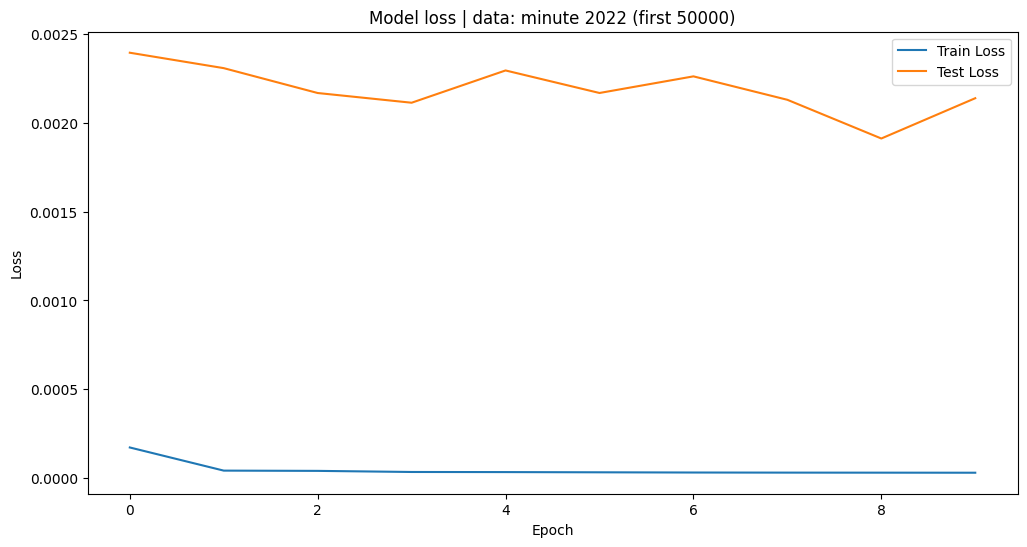

In [ ]:
# Plot training & validation loss values (learning curves)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model loss | data: minute 2022 (first 50000)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

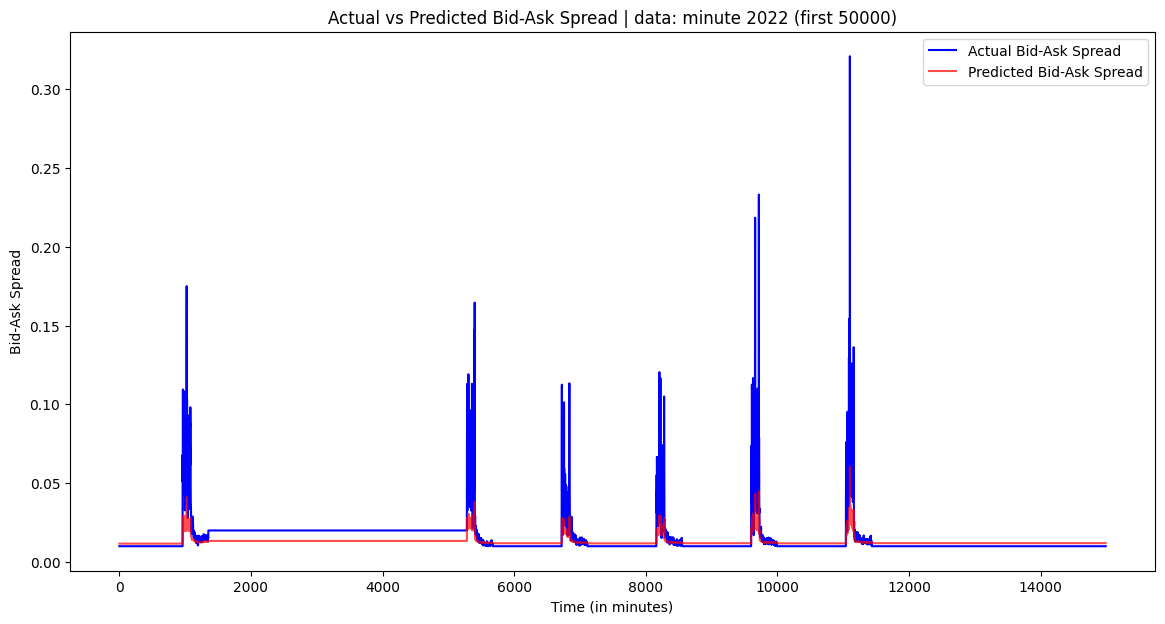

In [ ]:
# plotting predicted vs actual bid-ask spread

# If you've used a scaler, inverse transform the predicted and actual values
y_pred_original = scaler_y.inverse_transform(y_pred)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(y_test_original, label='Actual Bid-Ask Spread', color='blue')
plt.plot(y_pred_original, label='Predicted Bid-Ask Spread', color='red', alpha=0.7)
plt.title('Actual vs Predicted Bid-Ask Spread | data: minute 2022 (first 50000)')
plt.xlabel('Time (in minutes)')
plt.ylabel('Bid-Ask Spread')
plt.legend()
plt.show()


# 50000 added return sequence to model and extra lstm layers, with feature engineering



# 230916 50000 10 epochs - learning rate decay function, smaller learning rate, callback

In [ ]:
# for initial tests will make the df 50000 rows
DL_nbbo_aapl_agg_min_2022_50000 = DL_nbbo_aapl_agg_min_2022_filtered.head(50000)

In [ ]:
target_variable = ['Bid-Ask Spread Close']
explanatory_variables = ['Bid-price Open', 'Ask-price Open', 'Bid-price High', 'Ask-price High', 'Bid-price Low', 'Ask-price Low', 'Bid-price Close', 'Ask-price Close', 'Bid-size', 'Ask-size', 'Quotes-count', 'Year', 'Mid-Price Close', 'Order Imbalance', 'Intraday Returns', 'Volatility', 'Bid-Ask Spread Close_lag_1', 'Bid-price Open_lag_1', 'Ask-price Open_lag_1', 'Bid-price Close_lag_1', 'Ask-price Close_lag_1', 'Bid-Ask Spread Close_lag_5', 'Bid-price Open_lag_5', 'Ask-price Open_lag_5', 'Bid-price Close_lag_5', 'Ask-price Close_lag_5', 'Bid-Ask Spread Close_lag_10', 'Bid-price Open_lag_10', 'Ask-price Open_lag_10', 'Bid-price Close_lag_10', 'Ask-price Close_lag_10', 'Bid-Ask Spread Close_rolling_mean_5', 'Bid-Ask Spread Close_rolling_std_5', 'Bid-price Open_rolling_mean_5', 'Bid-price Open_rolling_std_5', 'Ask-price Open_rolling_mean_5', 'Ask-price Open_rolling_std_5', 'Bid-price Close_rolling_mean_5', 'Bid-price Close_rolling_std_5', 'Ask-price Close_rolling_mean_5', 'Ask-price Close_rolling_std_5', 'Bid-Ask Spread Close_rolling_mean_10', 'Bid-Ask Spread Close_rolling_std_10', 'Bid-price Open_rolling_mean_10', 'Bid-price Open_rolling_std_10', 'Ask-price Open_rolling_mean_10', 'Ask-price Open_rolling_std_10', 'Bid-price Close_rolling_mean_10', 'Bid-price Close_rolling_std_10', 'Ask-price Close_rolling_mean_10', 'Ask-price Close_rolling_std_10', 'Bid-Ask Spread Close_rolling_mean_30', 'Bid-Ask Spread Close_rolling_std_30', 'Bid-price Open_rolling_mean_30', 'Bid-price Open_rolling_std_30', 'Ask-price Open_rolling_mean_30', 'Ask-price Open_rolling_std_30', 'Bid-price Close_rolling_mean_30', 'Bid-price Close_rolling_std_30', 'Ask-price Close_rolling_mean_30', 'Ask-price Close_rolling_std_30', 'SMA_5', 'SMA_10', 'Spread_Percentage', 'Bid_Ask_Size_Interaction', 'Bid_Ask_Price_Interaction']

In [ ]:
# function for sequences for lstm
def create_sequences(data, sequence_length):
    X, y = [], [] # empty list for explanatory variables (X) and target variable (y)
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length][explanatory_variables].values
        target = data.iloc[i+sequence_length][target_variable].values[0]
        X.append(seq)
        y.append(target)
    return np.array(X), np.array(y)

# Choose a sequence length
sequence_length = 60

In [ ]:
# Create sequences
X, y = create_sequences(DL_nbbo_aapl_agg_min_2022_50000, sequence_length)

In [ ]:
# Split the data into training and testing sets
train_size = int(0.7 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# normalise data
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, len(explanatory_variables))).reshape(X_train.shape)
X_test_scaled = scaler_X.transform(X_test.reshape(-1, len(explanatory_variables))).reshape(X_test.shape)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)) # change

adjusting the learning rate for ADAM

20 epochs, new architecture

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

# Learning rate decay function
def lr_schedule(epoch, lr):
    if epoch > 0 and epoch % 3 == 0:  # For example, decay every 3 epochs
        return lr * 0.9  # Adjust this decay factor as needed
    return lr

# Define model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train_scaled.shape[1], len(explanatory_variables)), return_sequences=True))
model.add(Dropout(0.2))  # Regularization with dropout
model.add(LSTM(units=25, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Using a smaller learning rate for Adam
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='mean_squared_error')

callbacks = [LearningRateScheduler(lr_schedule, verbose=1)]

# Training with larger batch size
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(X_test_scaled, y_test_scaled), callbacks=callbacks)


Epoch 1: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 1/10
547/547 [==============================] - 74s 130ms/step - loss: 0.0020 - val_loss: 0.0027 - lr: 1.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 2/10
547/547 [==============================] - 60s 109ms/step - loss: 1.3196e-04 - val_loss: 0.0027 - lr: 1.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 3/10
547/547 [==============================] - 59s 109ms/step - loss: 9.4013e-05 - val_loss: 0.0027 - lr: 1.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 8.999999772640876e-05.
Epoch 4/10
547/547 [==============================] - 60s 110ms/step - loss: 7.7219e-05 - val_loss: 0.0027 - lr: 9.0000e-05

Epoch 5: LearningRateScheduler setting learning rate to 9.000000136438757e-05.
Epoch 5/10
547/547 [==============================] - 58s 106ms/step - loss: 6.9982e-05 - val_loss: 0.0027 -

In [ ]:
# previous architecture

"""

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# constructing LSTM model
model = Sequential()
model.add(LSTM(units=10, activation='relu', input_shape=(X_train_scaled.shape[1], len(explanatory_variables))))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
# training the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test_scaled))
"""

"\n\nfrom keras.models import Sequential\nfrom keras.layers import LSTM, Dense, Dropout\n\n# constructing LSTM model\nmodel = Sequential()\nmodel.add(LSTM(units=10, activation='relu', input_shape=(X_train_scaled.shape[1], len(explanatory_variables))))\nmodel.add(Dense(units=1))\nmodel.compile(optimizer='adam', loss='mean_squared_error')\n# training the model\nhistory = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test_scaled))\n"

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            23400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 25)                7600      
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense (Dense)               (None, 1)                 26        
                                                                 
Total params: 31,026
Trainable params: 31,026
Non-trainable params: 0
_________________________________________________________________


In [ ]:
predicted_bid_ask_spread = model.predict(X_test_scaled)

y_true = y_test
y_pred = predicted_bid_ask_spread

469/469 [==============================] - 20s 39ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Compute MSE, MAE, RMSE, MAPE, r2
def metrics_calc(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  mape = mean_absolute_percentage_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  performance_metrics = pd.DataFrame([['LSTM | data: minute 2022 (first 50000)', mse, mae, rmse, mape, r2]], columns = ['Model', 'MSE', 'MAE', 'RMSE', 'MAPE', 'R2'])
  return performance_metrics

metrics_calc(y_true, y_pred)

,Model,MSE,MAE,RMSE,MAPE,R2
0,LSTM | data: minute 2022 (first 50000),0.000079,0.004085,0.008898,30.914125,0.476902


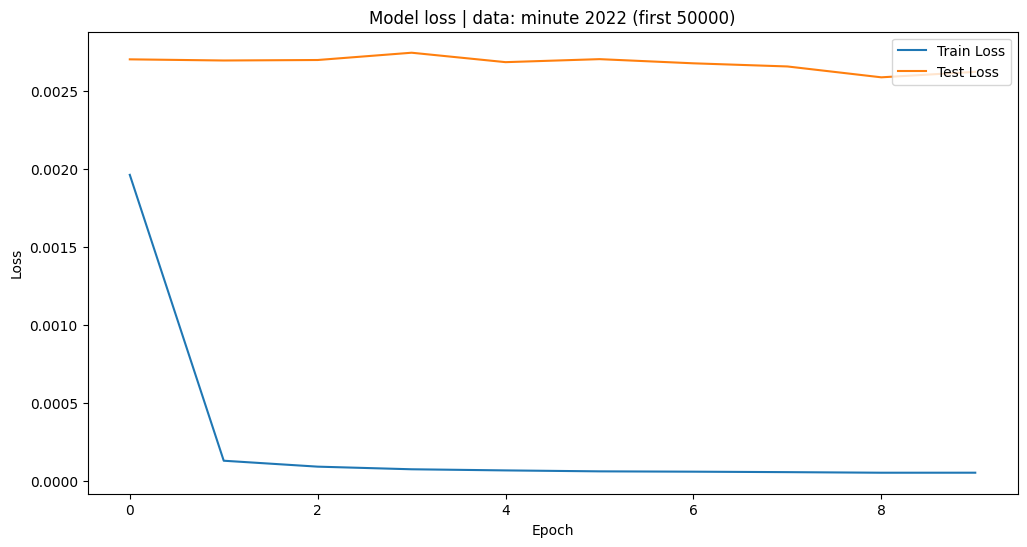

In [ ]:
# Plot training & validation loss values (learning curves)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model loss | data: minute 2022 (first 50000)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

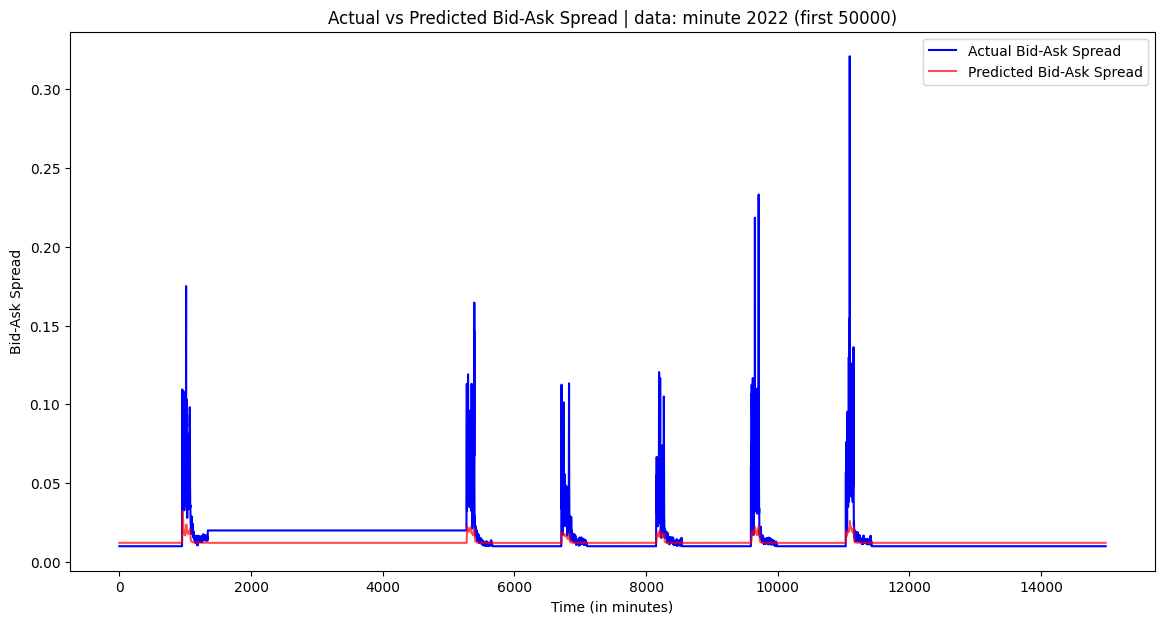

In [ ]:
# plotting predicted vs actual bid-ask spread

# If you've used a scaler, inverse transform the predicted and actual values
y_pred_original = scaler_y.inverse_transform(y_pred)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(y_test_original, label='Actual Bid-Ask Spread', color='blue')
plt.plot(y_pred_original, label='Predicted Bid-Ask Spread', color='red', alpha=0.7)
plt.title('Actual vs Predicted Bid-Ask Spread | data: minute 2022 (first 50000)')
plt.xlabel('Time (in minutes)')
plt.ylabel('Bid-Ask Spread')
plt.legend()
plt.show()


# 230916 50000 20 epochs - learning rate decay function, smaller learning rate, callback

In [ ]:
# for initial tests will make the df 50000 rows
DL_nbbo_aapl_agg_min_2022_50000 = DL_nbbo_aapl_agg_min_2022_filtered.head(50000)

In [ ]:
target_variable = ['Bid-Ask Spread Close']
explanatory_variables = ['Bid-price Open', 'Ask-price Open', 'Bid-price High', 'Ask-price High', 'Bid-price Low', 'Ask-price Low', 'Bid-price Close', 'Ask-price Close', 'Bid-size', 'Ask-size', 'Quotes-count', 'Year', 'Mid-Price Close', 'Order Imbalance', 'Intraday Returns', 'Volatility', 'Bid-Ask Spread Close_lag_1', 'Bid-price Open_lag_1', 'Ask-price Open_lag_1', 'Bid-price Close_lag_1', 'Ask-price Close_lag_1', 'Bid-Ask Spread Close_lag_5', 'Bid-price Open_lag_5', 'Ask-price Open_lag_5', 'Bid-price Close_lag_5', 'Ask-price Close_lag_5', 'Bid-Ask Spread Close_lag_10', 'Bid-price Open_lag_10', 'Ask-price Open_lag_10', 'Bid-price Close_lag_10', 'Ask-price Close_lag_10', 'Bid-Ask Spread Close_rolling_mean_5', 'Bid-Ask Spread Close_rolling_std_5', 'Bid-price Open_rolling_mean_5', 'Bid-price Open_rolling_std_5', 'Ask-price Open_rolling_mean_5', 'Ask-price Open_rolling_std_5', 'Bid-price Close_rolling_mean_5', 'Bid-price Close_rolling_std_5', 'Ask-price Close_rolling_mean_5', 'Ask-price Close_rolling_std_5', 'Bid-Ask Spread Close_rolling_mean_10', 'Bid-Ask Spread Close_rolling_std_10', 'Bid-price Open_rolling_mean_10', 'Bid-price Open_rolling_std_10', 'Ask-price Open_rolling_mean_10', 'Ask-price Open_rolling_std_10', 'Bid-price Close_rolling_mean_10', 'Bid-price Close_rolling_std_10', 'Ask-price Close_rolling_mean_10', 'Ask-price Close_rolling_std_10', 'Bid-Ask Spread Close_rolling_mean_30', 'Bid-Ask Spread Close_rolling_std_30', 'Bid-price Open_rolling_mean_30', 'Bid-price Open_rolling_std_30', 'Ask-price Open_rolling_mean_30', 'Ask-price Open_rolling_std_30', 'Bid-price Close_rolling_mean_30', 'Bid-price Close_rolling_std_30', 'Ask-price Close_rolling_mean_30', 'Ask-price Close_rolling_std_30', 'SMA_5', 'SMA_10', 'Spread_Percentage', 'Bid_Ask_Size_Interaction', 'Bid_Ask_Price_Interaction']

In [ ]:
# function for sequences for lstm
def create_sequences(data, sequence_length):
    X, y = [], [] # empty list for explanatory variables (X) and target variable (y)
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length][explanatory_variables].values
        target = data.iloc[i+sequence_length][target_variable].values[0]
        X.append(seq)
        y.append(target)
    return np.array(X), np.array(y)

# Choose a sequence length
sequence_length = 60

In [ ]:
# Create sequences
X, y = create_sequences(DL_nbbo_aapl_agg_min_2022_50000, sequence_length)

In [ ]:
# Split the data into training and testing sets
train_size = int(0.7 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# normalise data
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, len(explanatory_variables))).reshape(X_train.shape)
X_test_scaled = scaler_X.transform(X_test.reshape(-1, len(explanatory_variables))).reshape(X_test.shape)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)) # change

adjusting the learning rate for ADAM

20 epochs, new architecture

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

# Learning rate decay function
def lr_schedule(epoch, lr):
    if epoch > 0 and epoch % 3 == 0:  # For example, decay every 3 epochs
        return lr * 0.9  # Adjust this decay factor as needed
    return lr

# Define model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train_scaled.shape[1], len(explanatory_variables)), return_sequences=True))
model.add(Dropout(0.2))  # Regularization with dropout
model.add(LSTM(units=25, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Using a smaller learning rate for Adam
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='mean_squared_error')

callbacks = [LearningRateScheduler(lr_schedule, verbose=1)]

# Training with larger batch size
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, verbose=1, validation_data=(X_test_scaled, y_test_scaled), callbacks=callbacks)


Epoch 1: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 1/20
547/547 [==============================] - 73s 119ms/step - loss: 0.0018 - val_loss: 0.0029 - lr: 1.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 2/20
547/547 [==============================] - 59s 109ms/step - loss: 1.5853e-04 - val_loss: 0.0028 - lr: 1.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 3/20
547/547 [==============================] - 65s 119ms/step - loss: 1.1011e-04 - val_loss: 0.0026 - lr: 1.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 8.999999772640876e-05.
Epoch 4/20
547/547 [==============================] - 65s 119ms/step - loss: 8.6137e-05 - val_loss: 0.0027 - lr: 9.0000e-05

Epoch 5: LearningRateScheduler setting learning rate to 9.000000136438757e-05.
Epoch 5/20
547/547 [==============================] - 65s 120ms/step - loss: 7.4065e-05 - val_loss: 0.0026 -

In [ ]:
# previous architecture

"""

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# constructing LSTM model
model = Sequential()
model.add(LSTM(units=10, activation='relu', input_shape=(X_train_scaled.shape[1], len(explanatory_variables))))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
# training the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test_scaled))
"""

"\n\nfrom keras.models import Sequential\nfrom keras.layers import LSTM, Dense, Dropout\n\n# constructing LSTM model\nmodel = Sequential()\nmodel.add(LSTM(units=10, activation='relu', input_shape=(X_train_scaled.shape[1], len(explanatory_variables))))\nmodel.add(Dense(units=1))\nmodel.compile(optimizer='adam', loss='mean_squared_error')\n# training the model\nhistory = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test_scaled))\n"

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            23400     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 25)                7600      
                                                                 
 dropout_3 (Dropout)         (None, 25)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,026
Trainable params: 31,026
Non-trainable params: 0
_________________________________________________________________


In [ ]:
predicted_bid_ask_spread = model.predict(X_test_scaled)

y_true = y_test
y_pred = predicted_bid_ask_spread

469/469 [==============================] - 10s 21ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Compute MSE, MAE, RMSE, MAPE, r2
def metrics_calc(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  mape = mean_absolute_percentage_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  performance_metrics = pd.DataFrame([['LSTM | data: minute 2022 (first 50000)', mse, mae, rmse, mape, r2]], columns = ['Model', 'MSE', 'MAE', 'RMSE', 'MAPE', 'R2'])
  return performance_metrics

metrics_calc(y_true, y_pred)

,Model,MSE,MAE,RMSE,MAPE,R2
0,LSTM | data: minute 2022 (first 50000),0.000064,0.003933,0.007996,36.614316,0.577563


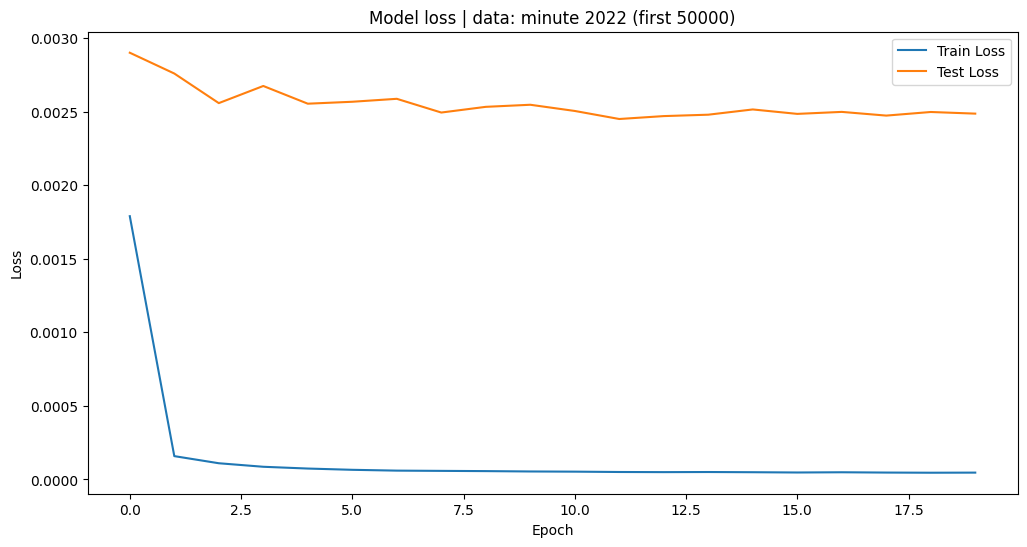

In [ ]:
# Plot training & validation loss values (learning curves)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model loss | data: minute 2022 (first 50000)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

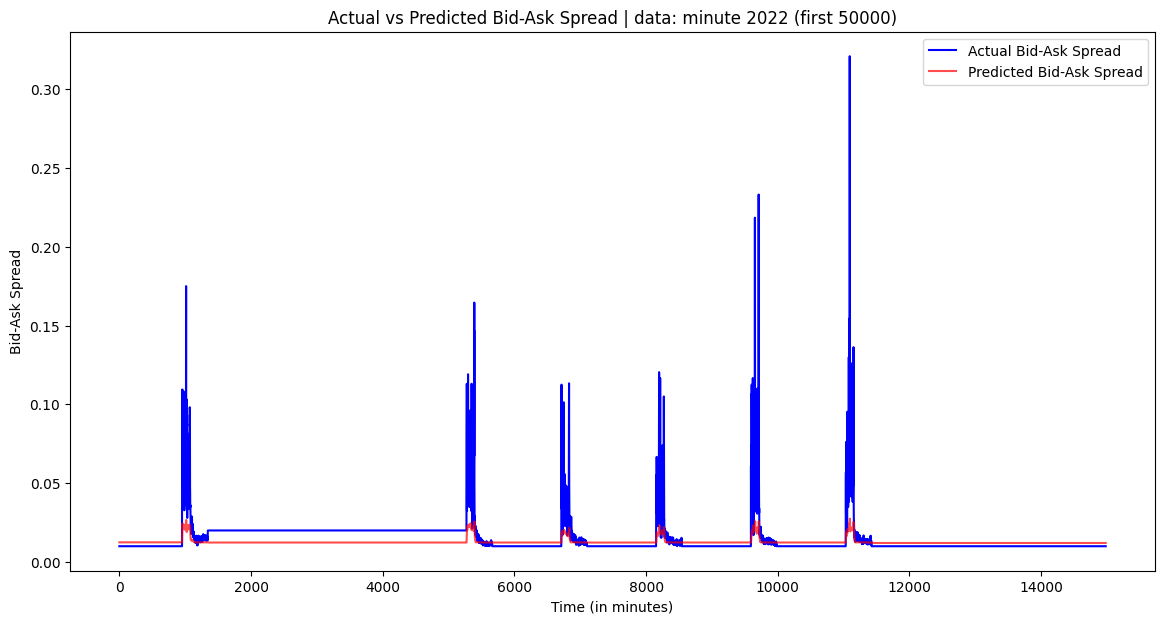

In [ ]:
# plotting predicted vs actual bid-ask spread

# If you've used a scaler, inverse transform the predicted and actual values
y_pred_original = scaler_y.inverse_transform(y_pred)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(y_test_original, label='Actual Bid-Ask Spread', color='blue')
plt.plot(y_pred_original, label='Predicted Bid-Ask Spread', color='red', alpha=0.7)
plt.title('Actual vs Predicted Bid-Ask Spread | data: minute 2022 (first 50000)')
plt.xlabel('Time (in minutes)')
plt.ylabel('Bid-Ask Spread')
plt.legend()
plt.show()


# 230916 50000 30 epochs - learning rate decay function, smaller learning rate, callback

In [ ]:
# for initial tests will make the df 50000 rows
DL_nbbo_aapl_agg_min_2022_50000 = DL_nbbo_aapl_agg_min_2022_filtered.head(50000)

In [ ]:
target_variable = ['Bid-Ask Spread Close']
explanatory_variables = ['Bid-price Open', 'Ask-price Open', 'Bid-price High', 'Ask-price High', 'Bid-price Low', 'Ask-price Low', 'Bid-price Close', 'Ask-price Close', 'Bid-size', 'Ask-size', 'Quotes-count', 'Year', 'Mid-Price Close', 'Order Imbalance', 'Intraday Returns', 'Volatility', 'Bid-Ask Spread Close_lag_1', 'Bid-price Open_lag_1', 'Ask-price Open_lag_1', 'Bid-price Close_lag_1', 'Ask-price Close_lag_1', 'Bid-Ask Spread Close_lag_5', 'Bid-price Open_lag_5', 'Ask-price Open_lag_5', 'Bid-price Close_lag_5', 'Ask-price Close_lag_5', 'Bid-Ask Spread Close_lag_10', 'Bid-price Open_lag_10', 'Ask-price Open_lag_10', 'Bid-price Close_lag_10', 'Ask-price Close_lag_10', 'Bid-Ask Spread Close_rolling_mean_5', 'Bid-Ask Spread Close_rolling_std_5', 'Bid-price Open_rolling_mean_5', 'Bid-price Open_rolling_std_5', 'Ask-price Open_rolling_mean_5', 'Ask-price Open_rolling_std_5', 'Bid-price Close_rolling_mean_5', 'Bid-price Close_rolling_std_5', 'Ask-price Close_rolling_mean_5', 'Ask-price Close_rolling_std_5', 'Bid-Ask Spread Close_rolling_mean_10', 'Bid-Ask Spread Close_rolling_std_10', 'Bid-price Open_rolling_mean_10', 'Bid-price Open_rolling_std_10', 'Ask-price Open_rolling_mean_10', 'Ask-price Open_rolling_std_10', 'Bid-price Close_rolling_mean_10', 'Bid-price Close_rolling_std_10', 'Ask-price Close_rolling_mean_10', 'Ask-price Close_rolling_std_10', 'Bid-Ask Spread Close_rolling_mean_30', 'Bid-Ask Spread Close_rolling_std_30', 'Bid-price Open_rolling_mean_30', 'Bid-price Open_rolling_std_30', 'Ask-price Open_rolling_mean_30', 'Ask-price Open_rolling_std_30', 'Bid-price Close_rolling_mean_30', 'Bid-price Close_rolling_std_30', 'Ask-price Close_rolling_mean_30', 'Ask-price Close_rolling_std_30', 'SMA_5', 'SMA_10', 'Spread_Percentage', 'Bid_Ask_Size_Interaction', 'Bid_Ask_Price_Interaction']

In [ ]:
# function for sequences for lstm
def create_sequences(data, sequence_length):
    X, y = [], [] # empty list for explanatory variables (X) and target variable (y)
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length][explanatory_variables].values
        target = data.iloc[i+sequence_length][target_variable].values[0]
        X.append(seq)
        y.append(target)
    return np.array(X), np.array(y)

# Choose a sequence length
sequence_length = 60

In [ ]:
# Create sequences
X, y = create_sequences(DL_nbbo_aapl_agg_min_2022_50000, sequence_length)

In [ ]:
# Split the data into training and testing sets
train_size = int(0.7 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# normalise data
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, len(explanatory_variables))).reshape(X_train.shape)
X_test_scaled = scaler_X.transform(X_test.reshape(-1, len(explanatory_variables))).reshape(X_test.shape)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)) # change

adjusting the learning rate for ADAM

20 epochs, new architecture

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

# Learning rate decay function
def lr_schedule(epoch, lr):
    if epoch > 0 and epoch % 3 == 0:  # For example, decay every 3 epochs
        return lr * 0.9  # Adjust this decay factor as needed
    return lr

# Define model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train_scaled.shape[1], len(explanatory_variables)), return_sequences=True))
model.add(Dropout(0.2))  # Regularization with dropout
model.add(LSTM(units=25, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Using a smaller learning rate for Adam
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='mean_squared_error')

callbacks = [LearningRateScheduler(lr_schedule, verbose=1)]

# Training with larger batch size
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=64, verbose=1, validation_data=(X_test_scaled, y_test_scaled), callbacks=callbacks)


Epoch 1: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 1/30
547/547 [==============================] - 69s 121ms/step - loss: 0.0010 - val_loss: 0.0030 - lr: 1.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 2/30
547/547 [==============================] - 62s 113ms/step - loss: 1.0648e-04 - val_loss: 0.0029 - lr: 1.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 3/30
547/547 [==============================] - 61s 112ms/step - loss: 8.3245e-05 - val_loss: 0.0027 - lr: 1.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 8.999999772640876e-05.
Epoch 4/30
547/547 [==============================] - 66s 121ms/step - loss: 7.0411e-05 - val_loss: 0.0027 - lr: 9.0000e-05

Epoch 5: LearningRateScheduler setting learning rate to 9.000000136438757e-05.
Epoch 5/30
547/547 [==============================] - 63s 115ms/step - loss: 6.3938e-05 - val_loss: 0.0027 -

In [ ]:
# previous architecture

"""

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# constructing LSTM model
model = Sequential()
model.add(LSTM(units=10, activation='relu', input_shape=(X_train_scaled.shape[1], len(explanatory_variables))))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
# training the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test_scaled))
"""

"\n\nfrom keras.models import Sequential\nfrom keras.layers import LSTM, Dense, Dropout\n\n# constructing LSTM model\nmodel = Sequential()\nmodel.add(LSTM(units=10, activation='relu', input_shape=(X_train_scaled.shape[1], len(explanatory_variables))))\nmodel.add(Dense(units=1))\nmodel.compile(optimizer='adam', loss='mean_squared_error')\n# training the model\nhistory = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test_scaled))\n"

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            23400     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 25)                7600      
                                                                 
 dropout_5 (Dropout)         (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,026
Trainable params: 31,026
Non-trainable params: 0
_________________________________________________________________


In [ ]:
predicted_bid_ask_spread = model.predict(X_test_scaled)

y_true = y_test
y_pred = predicted_bid_ask_spread

469/469 [==============================] - 16s 34ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Compute MSE, MAE, RMSE, MAPE, r2
def metrics_calc(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  mape = mean_absolute_percentage_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  performance_metrics = pd.DataFrame([['LSTM | data: minute 2022 (first 50000)', mse, mae, rmse, mape, r2]], columns = ['Model', 'MSE', 'MAE', 'RMSE', 'MAPE', 'R2'])
  return performance_metrics

metrics_calc(y_true, y_pred)

,Model,MSE,MAE,RMSE,MAPE,R2
0,LSTM | data: minute 2022 (first 50000),0.000061,0.003595,0.007829,36.275394,0.595109


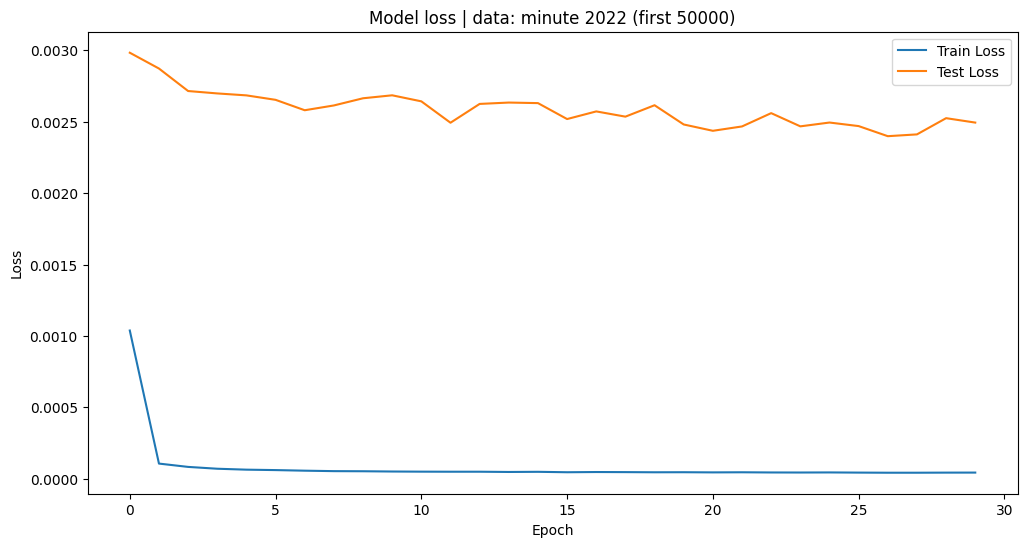

In [ ]:
# Plot training & validation loss values (learning curves)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model loss | data: minute 2022 (first 50000)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

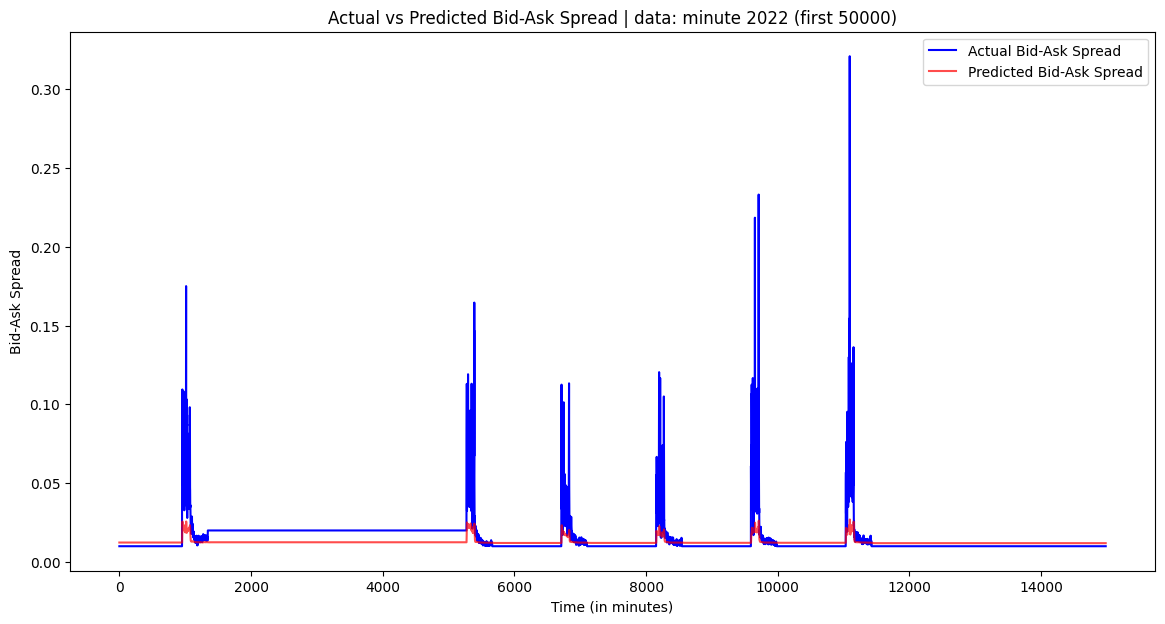

In [ ]:
# plotting predicted vs actual bid-ask spread

# If you've used a scaler, inverse transform the predicted and actual values
y_pred_original = scaler_y.inverse_transform(y_pred)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(y_test_original, label='Actual Bid-Ask Spread', color='blue')
plt.plot(y_pred_original, label='Predicted Bid-Ask Spread', color='red', alpha=0.7)
plt.title('Actual vs Predicted Bid-Ask Spread | data: minute 2022 (first 50000)')
plt.xlabel('Time (in minutes)')
plt.ylabel('Bid-Ask Spread')
plt.legend()
plt.show()


# 230916 100000 10 epochs - learning rate decay function, smaller learning rate, callback

In [ ]:
# for initial tests will make the df 50000 rows
DL_nbbo_aapl_agg_min_2022_50000 = DL_nbbo_aapl_agg_min_2022_filtered.head(100000)

In [ ]:
target_variable = ['Bid-Ask Spread Close']
explanatory_variables = ['Bid-price Open', 'Ask-price Open', 'Bid-price High', 'Ask-price High', 'Bid-price Low', 'Ask-price Low', 'Bid-price Close', 'Ask-price Close', 'Bid-size', 'Ask-size', 'Quotes-count', 'Year', 'Mid-Price Close', 'Order Imbalance', 'Intraday Returns', 'Volatility', 'Bid-Ask Spread Close_lag_1', 'Bid-price Open_lag_1', 'Ask-price Open_lag_1', 'Bid-price Close_lag_1', 'Ask-price Close_lag_1', 'Bid-Ask Spread Close_lag_5', 'Bid-price Open_lag_5', 'Ask-price Open_lag_5', 'Bid-price Close_lag_5', 'Ask-price Close_lag_5', 'Bid-Ask Spread Close_lag_10', 'Bid-price Open_lag_10', 'Ask-price Open_lag_10', 'Bid-price Close_lag_10', 'Ask-price Close_lag_10', 'Bid-Ask Spread Close_rolling_mean_5', 'Bid-Ask Spread Close_rolling_std_5', 'Bid-price Open_rolling_mean_5', 'Bid-price Open_rolling_std_5', 'Ask-price Open_rolling_mean_5', 'Ask-price Open_rolling_std_5', 'Bid-price Close_rolling_mean_5', 'Bid-price Close_rolling_std_5', 'Ask-price Close_rolling_mean_5', 'Ask-price Close_rolling_std_5', 'Bid-Ask Spread Close_rolling_mean_10', 'Bid-Ask Spread Close_rolling_std_10', 'Bid-price Open_rolling_mean_10', 'Bid-price Open_rolling_std_10', 'Ask-price Open_rolling_mean_10', 'Ask-price Open_rolling_std_10', 'Bid-price Close_rolling_mean_10', 'Bid-price Close_rolling_std_10', 'Ask-price Close_rolling_mean_10', 'Ask-price Close_rolling_std_10', 'Bid-Ask Spread Close_rolling_mean_30', 'Bid-Ask Spread Close_rolling_std_30', 'Bid-price Open_rolling_mean_30', 'Bid-price Open_rolling_std_30', 'Ask-price Open_rolling_mean_30', 'Ask-price Open_rolling_std_30', 'Bid-price Close_rolling_mean_30', 'Bid-price Close_rolling_std_30', 'Ask-price Close_rolling_mean_30', 'Ask-price Close_rolling_std_30', 'SMA_5', 'SMA_10', 'Spread_Percentage', 'Bid_Ask_Size_Interaction', 'Bid_Ask_Price_Interaction']

In [ ]:
# function for sequences for lstm
def create_sequences(data, sequence_length):
    X, y = [], [] # empty list for explanatory variables (X) and target variable (y)
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length][explanatory_variables].values
        target = data.iloc[i+sequence_length][target_variable].values[0]
        X.append(seq)
        y.append(target)
    return np.array(X), np.array(y)

# Choose a sequence length
sequence_length = 60

In [ ]:
# Create sequences
X, y = create_sequences(DL_nbbo_aapl_agg_min_2022_50000, sequence_length)

In [ ]:
# Split the data into training and testing sets
train_size = int(0.5 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# normalise data
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, len(explanatory_variables))).reshape(X_train.shape)
X_test_scaled = scaler_X.transform(X_test.reshape(-1, len(explanatory_variables))).reshape(X_test.shape)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)) # change

adjusting the learning rate for ADAM

20 epochs, new architecture

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

# Learning rate decay function
def lr_schedule(epoch, lr):
    if epoch > 0 and epoch % 3 == 0:  # For example, decay every 3 epochs
        return lr * 0.9  # Adjust this decay factor as needed
    return lr

# Define model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train_scaled.shape[1], len(explanatory_variables)), return_sequences=True))
model.add(Dropout(0.2))  # Regularization with dropout
model.add(LSTM(units=25, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Using a smaller learning rate for Adam
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='mean_squared_error')

callbacks = [LearningRateScheduler(lr_schedule, verbose=1)]

# Training with larger batch size
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(X_test_scaled, y_test_scaled), callbacks=callbacks)


Epoch 1: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 1/10
781/781 [==============================] - 53s 65ms/step - loss: 6.3810e-04 - val_loss: 0.0013 - lr: 1.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 2/10
781/781 [==============================] - 50s 64ms/step - loss: 8.5305e-05 - val_loss: 0.0012 - lr: 1.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 3/10
781/781 [==============================] - 50s 64ms/step - loss: 6.8889e-05 - val_loss: 0.0012 - lr: 1.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 8.999999772640876e-05.
Epoch 4/10
781/781 [==============================] - 51s 65ms/step - loss: 6.2630e-05 - val_loss: 0.0012 - lr: 9.0000e-05

Epoch 5: LearningRateScheduler setting learning rate to 9.000000136438757e-05.
Epoch 5/10
781/781 [==============================] - 51s 65ms/step - loss: 5.8313e-05 - val_loss: 0.0012 - 

In [ ]:
# previous architecture

"""

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# constructing LSTM model
model = Sequential()
model.add(LSTM(units=10, activation='relu', input_shape=(X_train_scaled.shape[1], len(explanatory_variables))))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
# training the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test_scaled))
"""

"\n\nfrom keras.models import Sequential\nfrom keras.layers import LSTM, Dense, Dropout\n\n# constructing LSTM model\nmodel = Sequential()\nmodel.add(LSTM(units=10, activation='relu', input_shape=(X_train_scaled.shape[1], len(explanatory_variables))))\nmodel.add(Dense(units=1))\nmodel.compile(optimizer='adam', loss='mean_squared_error')\n# training the model\nhistory = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test_scaled))\n"

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            23400     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 25)                7600      
                                                                 
 dropout_5 (Dropout)         (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,026
Trainable params: 31,026
Non-trainable params: 0
_________________________________________________________________


In [ ]:
predicted_bid_ask_spread = model.predict(X_test_scaled)

y_true = y_test
y_pred = predicted_bid_ask_spread

1562/1562 [==============================] - 20s 13ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Compute MSE, MAE, RMSE, MAPE, r2
def metrics_calc(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  mape = mean_absolute_percentage_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  performance_metrics = pd.DataFrame([['LSTM | data: minute 2022 (first 50000)', mse, mae, rmse, mape, r2]], columns = ['Model', 'MSE', 'MAE', 'RMSE', 'MAPE', 'R2'])
  return performance_metrics

metrics_calc(y_true, y_pred)

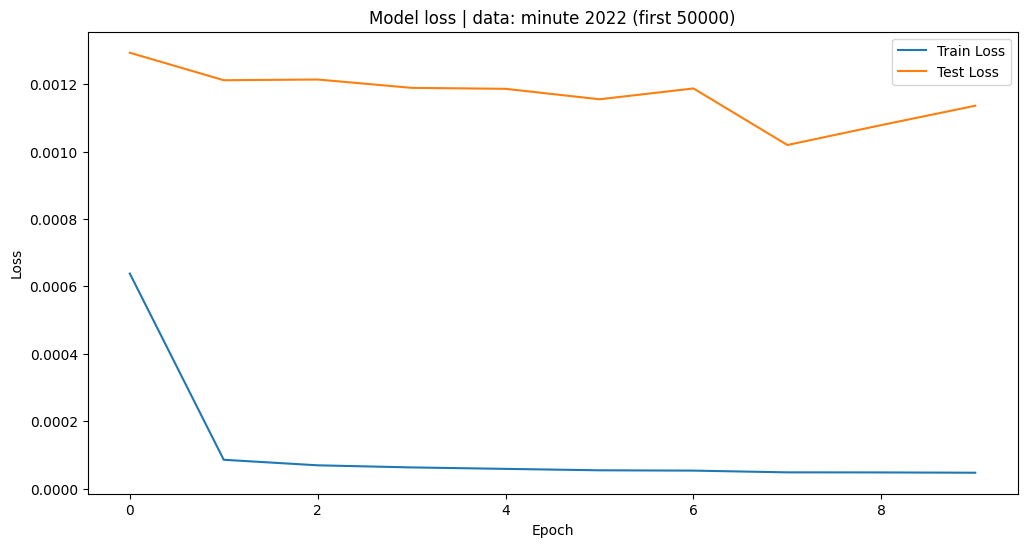

In [ ]:
# Plot training & validation loss values (learning curves)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model loss | data: minute 2022 (first 50000)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

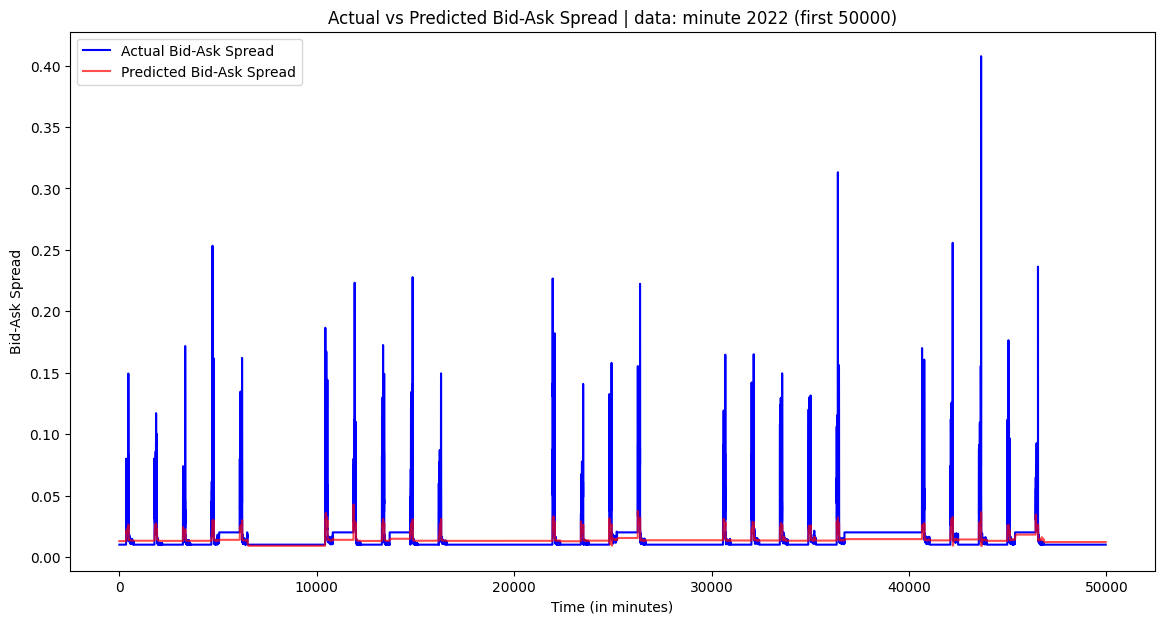

In [ ]:
# plotting predicted vs actual bid-ask spread

# If you've used a scaler, inverse transform the predicted and actual values
y_pred_original = scaler_y.inverse_transform(y_pred)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(y_test_original, label='Actual Bid-Ask Spread', color='blue')
plt.plot(y_pred_original, label='Predicted Bid-Ask Spread', color='red', alpha=0.7)
plt.title('Actual vs Predicted Bid-Ask Spread | data: minute 2022 (first 50000)')
plt.xlabel('Time (in minutes)')
plt.ylabel('Bid-Ask Spread')
plt.legend()
plt.show()


# 230916 100000 20 epochs - learning rate decay function, smaller learning rate, callback

In [ ]:
# for initial tests will make the df 50000 rows
DL_nbbo_aapl_agg_min_2022_50000 = DL_nbbo_aapl_agg_min_2022_filtered.head(100000)

In [ ]:
target_variable = ['Bid-Ask Spread Close']
explanatory_variables = ['Bid-price Open', 'Ask-price Open', 'Bid-price High', 'Ask-price High', 'Bid-price Low', 'Ask-price Low', 'Bid-price Close', 'Ask-price Close', 'Bid-size', 'Ask-size', 'Quotes-count', 'Year', 'Mid-Price Close', 'Order Imbalance', 'Intraday Returns', 'Volatility', 'Bid-Ask Spread Close_lag_1', 'Bid-price Open_lag_1', 'Ask-price Open_lag_1', 'Bid-price Close_lag_1', 'Ask-price Close_lag_1', 'Bid-Ask Spread Close_lag_5', 'Bid-price Open_lag_5', 'Ask-price Open_lag_5', 'Bid-price Close_lag_5', 'Ask-price Close_lag_5', 'Bid-Ask Spread Close_lag_10', 'Bid-price Open_lag_10', 'Ask-price Open_lag_10', 'Bid-price Close_lag_10', 'Ask-price Close_lag_10', 'Bid-Ask Spread Close_rolling_mean_5', 'Bid-Ask Spread Close_rolling_std_5', 'Bid-price Open_rolling_mean_5', 'Bid-price Open_rolling_std_5', 'Ask-price Open_rolling_mean_5', 'Ask-price Open_rolling_std_5', 'Bid-price Close_rolling_mean_5', 'Bid-price Close_rolling_std_5', 'Ask-price Close_rolling_mean_5', 'Ask-price Close_rolling_std_5', 'Bid-Ask Spread Close_rolling_mean_10', 'Bid-Ask Spread Close_rolling_std_10', 'Bid-price Open_rolling_mean_10', 'Bid-price Open_rolling_std_10', 'Ask-price Open_rolling_mean_10', 'Ask-price Open_rolling_std_10', 'Bid-price Close_rolling_mean_10', 'Bid-price Close_rolling_std_10', 'Ask-price Close_rolling_mean_10', 'Ask-price Close_rolling_std_10', 'Bid-Ask Spread Close_rolling_mean_30', 'Bid-Ask Spread Close_rolling_std_30', 'Bid-price Open_rolling_mean_30', 'Bid-price Open_rolling_std_30', 'Ask-price Open_rolling_mean_30', 'Ask-price Open_rolling_std_30', 'Bid-price Close_rolling_mean_30', 'Bid-price Close_rolling_std_30', 'Ask-price Close_rolling_mean_30', 'Ask-price Close_rolling_std_30', 'SMA_5', 'SMA_10', 'Spread_Percentage', 'Bid_Ask_Size_Interaction', 'Bid_Ask_Price_Interaction']

In [ ]:
# function for sequences for lstm
def create_sequences(data, sequence_length):
    X, y = [], [] # empty list for explanatory variables (X) and target variable (y)
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length][explanatory_variables].values
        target = data.iloc[i+sequence_length][target_variable].values[0]
        X.append(seq)
        y.append(target)
    return np.array(X), np.array(y)

# Choose a sequence length
sequence_length = 60

In [ ]:
# Create sequences
X, y = create_sequences(DL_nbbo_aapl_agg_min_2022_50000, sequence_length)

In [ ]:
# Split the data into training and testing sets
train_size = int(0.5 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# normalise data
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, len(explanatory_variables))).reshape(X_train.shape)
X_test_scaled = scaler_X.transform(X_test.reshape(-1, len(explanatory_variables))).reshape(X_test.shape)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)) # change

adjusting the learning rate for ADAM

20 epochs, new architecture

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

# Learning rate decay function
def lr_schedule(epoch, lr):
    if epoch > 0 and epoch % 3 == 0:  # For example, decay every 3 epochs
        return lr * 0.9  # Adjust this decay factor as needed
    return lr

# Define model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train_scaled.shape[1], len(explanatory_variables)), return_sequences=True))
model.add(Dropout(0.2))  # Regularization with dropout
model.add(LSTM(units=25, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Using a smaller learning rate for Adam
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='mean_squared_error')

callbacks = [LearningRateScheduler(lr_schedule, verbose=1)]

# Training with larger batch size
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, verbose=1, validation_data=(X_test_scaled, y_test_scaled), callbacks=callbacks)


Epoch 1: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 1/20
781/781 [==============================] - 53s 65ms/step - loss: 6.4923e-04 - val_loss: 0.0014 - lr: 1.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 2/20
781/781 [==============================] - 50s 65ms/step - loss: 9.0385e-05 - val_loss: 0.0013 - lr: 1.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 3/20
781/781 [==============================] - 50s 64ms/step - loss: 7.4424e-05 - val_loss: 0.0013 - lr: 1.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 8.999999772640876e-05.
Epoch 4/20
781/781 [==============================] - 50s 64ms/step - loss: 6.5589e-05 - val_loss: 0.0013 - lr: 9.0000e-05

Epoch 5: LearningRateScheduler setting learning rate to 9.000000136438757e-05.
Epoch 5/20
781/781 [==============================] - 50s 64ms/step - loss: 6.0855e-05 - val_loss: 0.0012 - 

In [ ]:
# previous architecture

"""

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# constructing LSTM model
model = Sequential()
model.add(LSTM(units=10, activation='relu', input_shape=(X_train_scaled.shape[1], len(explanatory_variables))))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
# training the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test_scaled))
"""

"\n\nfrom keras.models import Sequential\nfrom keras.layers import LSTM, Dense, Dropout\n\n# constructing LSTM model\nmodel = Sequential()\nmodel.add(LSTM(units=10, activation='relu', input_shape=(X_train_scaled.shape[1], len(explanatory_variables))))\nmodel.add(Dense(units=1))\nmodel.compile(optimizer='adam', loss='mean_squared_error')\n# training the model\nhistory = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test_scaled))\n"

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            23400     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 25)                7600      
                                                                 
 dropout_5 (Dropout)         (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,026
Trainable params: 31,026
Non-trainable params: 0
_________________________________________________________________


In [ ]:
predicted_bid_ask_spread = model.predict(X_test_scaled)

y_true = y_test
y_pred = predicted_bid_ask_spread

1562/1562 [==============================] - 20s 13ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Compute MSE, MAE, RMSE, MAPE, r2
def metrics_calc(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  mape = mean_absolute_percentage_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  performance_metrics = pd.DataFrame([['LSTM | data: minute 2022 (first 50000)', mse, mae, rmse, mape, r2]], columns = ['Model', 'MSE', 'MAE', 'RMSE', 'MAPE', 'R2'])
  return performance_metrics

metrics_calc(y_true, y_pred)

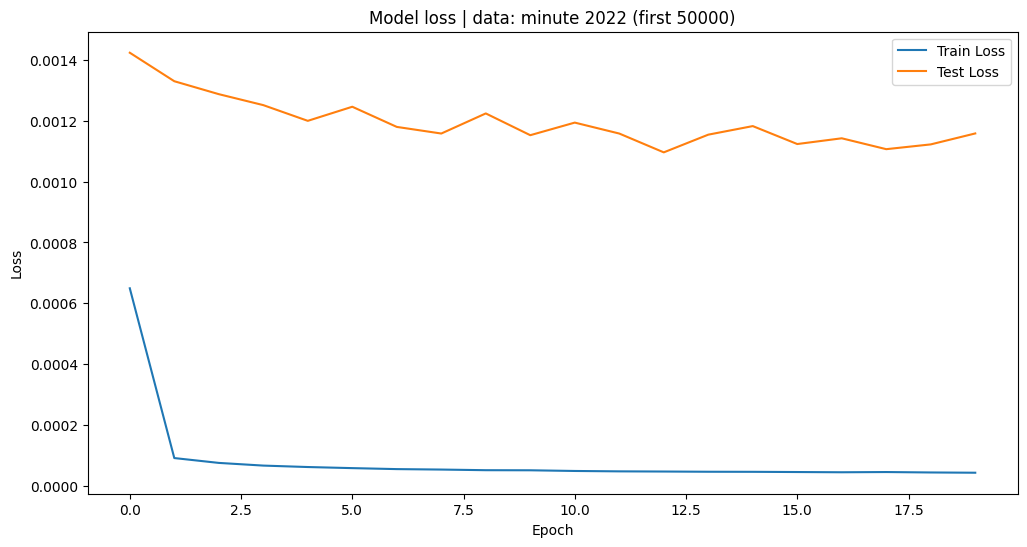

In [ ]:
# Plot training & validation loss values (learning curves)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model loss | data: minute 2022 (first 50000)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

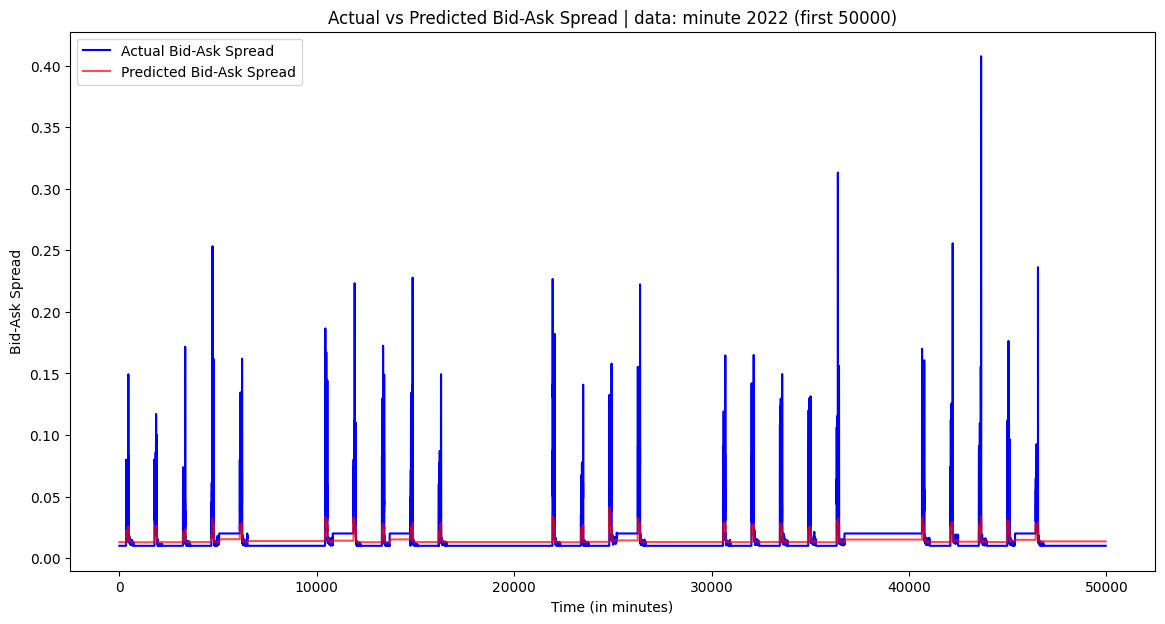

In [ ]:
# plotting predicted vs actual bid-ask spread

# If you've used a scaler, inverse transform the predicted and actual values
y_pred_original = scaler_y.inverse_transform(y_pred)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(y_test_original, label='Actual Bid-Ask Spread', color='blue')
plt.plot(y_pred_original, label='Predicted Bid-Ask Spread', color='red', alpha=0.7)
plt.title('Actual vs Predicted Bid-Ask Spread | data: minute 2022 (first 50000)')
plt.xlabel('Time (in minutes)')
plt.ylabel('Bid-Ask Spread')
plt.legend()
plt.show()


# using lower learning rate

In [ ]:
# for initial tests will make the df 50000 rows
DL_nbbo_aapl_agg_min_2022_50000 = DL_nbbo_aapl_agg_min_2022_filtered.head(50000)

In [ ]:
target_variable = ['Bid-Ask Spread Close']
explanatory_variables = ['Bid-price Open', 'Ask-price Open', 'Bid-price High', 'Ask-price High', 'Bid-price Low', 'Ask-price Low', 'Bid-price Close', 'Ask-price Close', 'Bid-size', 'Ask-size', 'Quotes-count', 'Year', 'Mid-Price Close', 'Order Imbalance', 'Intraday Returns', 'Volatility', 'Bid-Ask Spread Close_lag_1', 'Bid-price Open_lag_1', 'Ask-price Open_lag_1', 'Bid-price Close_lag_1', 'Ask-price Close_lag_1', 'Bid-Ask Spread Close_lag_5', 'Bid-price Open_lag_5', 'Ask-price Open_lag_5', 'Bid-price Close_lag_5', 'Ask-price Close_lag_5', 'Bid-Ask Spread Close_lag_10', 'Bid-price Open_lag_10', 'Ask-price Open_lag_10', 'Bid-price Close_lag_10', 'Ask-price Close_lag_10', 'Bid-Ask Spread Close_rolling_mean_5', 'Bid-Ask Spread Close_rolling_std_5', 'Bid-price Open_rolling_mean_5', 'Bid-price Open_rolling_std_5', 'Ask-price Open_rolling_mean_5', 'Ask-price Open_rolling_std_5', 'Bid-price Close_rolling_mean_5', 'Bid-price Close_rolling_std_5', 'Ask-price Close_rolling_mean_5', 'Ask-price Close_rolling_std_5', 'Bid-Ask Spread Close_rolling_mean_10', 'Bid-Ask Spread Close_rolling_std_10', 'Bid-price Open_rolling_mean_10', 'Bid-price Open_rolling_std_10', 'Ask-price Open_rolling_mean_10', 'Ask-price Open_rolling_std_10', 'Bid-price Close_rolling_mean_10', 'Bid-price Close_rolling_std_10', 'Ask-price Close_rolling_mean_10', 'Ask-price Close_rolling_std_10', 'Bid-Ask Spread Close_rolling_mean_30', 'Bid-Ask Spread Close_rolling_std_30', 'Bid-price Open_rolling_mean_30', 'Bid-price Open_rolling_std_30', 'Ask-price Open_rolling_mean_30', 'Ask-price Open_rolling_std_30', 'Bid-price Close_rolling_mean_30', 'Bid-price Close_rolling_std_30', 'Ask-price Close_rolling_mean_30', 'Ask-price Close_rolling_std_30', 'SMA_5', 'SMA_10', 'Spread_Percentage', 'Bid_Ask_Size_Interaction', 'Bid_Ask_Price_Interaction']

In [ ]:
# function for sequences for lstm
def create_sequences(data, sequence_length):
    X, y = [], [] # empty list for explanatory variables (X) and target variable (y)
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length][explanatory_variables].values
        target = data.iloc[i+sequence_length][target_variable].values[0]
        X.append(seq)
        y.append(target)
    return np.array(X), np.array(y)

# Choose a sequence length
sequence_length = 30

In [ ]:
# Create sequences
X, y = create_sequences(DL_nbbo_aapl_agg_min_2022_50000, sequence_length)

In [ ]:
# Split the data into training and testing sets
train_size = int(0.7 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# normalise data
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, len(explanatory_variables))).reshape(X_train.shape)
X_test_scaled = scaler_X.transform(X_test.reshape(-1, len(explanatory_variables))).reshape(X_test.shape)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)) # change

In [ ]:
"""
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

learning_rate = 0.002
beta_1_value = 0.9  # (default is 0.9)

adam_optimizer = Adam(learning_rate=learning_rate, beta_1=beta_1_value)

# constructing LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train_scaled.shape[1], len(explanatory_variables))))
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer=adam_optimizer, loss='mean_squared_error')
# training the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test_scaled))
"""

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

learning_rate = 0.0001
beta_1_value = 0.9  # (default is 0.9)

adam_optimizer = Adam(learning_rate=learning_rate, beta_1=beta_1_value)

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='relu'))
model.compile(optimizer=adam_optimizer, loss='mean_squared_error')
history = model.fit(X_train, y_train, validation_split=0.3, epochs=10, batch_size=64)

Epoch 1/10
383/383 [==============================] - 37s 68ms/step - loss: 0.0019 - val_loss: 4.8594e-04
Epoch 2/10
383/383 [==============================] - 27s 71ms/step - loss: 3.3454e-04 - val_loss: 4.8594e-04
Epoch 3/10
383/383 [==============================] - 26s 68ms/step - loss: 3.1008e-04 - val_loss: 4.8594e-04
Epoch 4/10
383/383 [==============================] - 25s 64ms/step - loss: 3.0733e-04 - val_loss: 4.8594e-04
Epoch 5/10
383/383 [==============================] - 28s 74ms/step - loss: 3.0794e-04 - val_loss: 4.8594e-04
Epoch 6/10
383/383 [==============================] - 33s 85ms/step - loss: 3.0514e-04 - val_loss: 4.8594e-04
Epoch 7/10
383/383 [==============================] - 27s 72ms/step - loss: 3.0653e-04 - val_loss: 4.8594e-04
Epoch 8/10
383/383 [==============================] - 26s 68ms/step - loss: 3.0558e-04 - val_loss: 4.8594e-04
Epoch 9/10
383/383 [==============================] - 25s 65ms/step - loss: 3.0500e-04 - val_loss: 4.8594e-04
Epoch 10/10
38

In [ ]:
# previous architecture

"""

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# constructing LSTM model
model = Sequential()
model.add(LSTM(units=10, activation='relu', input_shape=(X_train_scaled.shape[1], len(explanatory_variables))))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
# training the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test_scaled))
"""

Epoch 1/10


KeyboardInterrupt: ignored

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 50)            23400     
                                                                 
 dropout_4 (Dropout)         (None, 30, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 43,651
Trainable params: 43,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
predicted_bid_ask_spread = model.predict(X_test_scaled)

y_true = y_test
y_pred = predicted_bid_ask_spread

469/469 [==============================] - 7s 14ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Compute MSE, MAE, RMSE, MAPE, r2
def metrics_calc(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  mape = mean_absolute_percentage_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  performance_metrics = pd.DataFrame([['LSTM | data: minute 2022 (first 50000)', mse, mae, rmse, mape, r2]], columns = ['Model', 'MSE', 'MAE', 'RMSE', 'MAPE', 'R2'])
  return performance_metrics

metrics_calc(y_true, y_pred)

,Model,MSE,MAE,RMSE,MAPE,R2
0,LSTM | data: minute 2022 (first 50000),0.000389,0.015422,0.019726,100.0,-1.57198


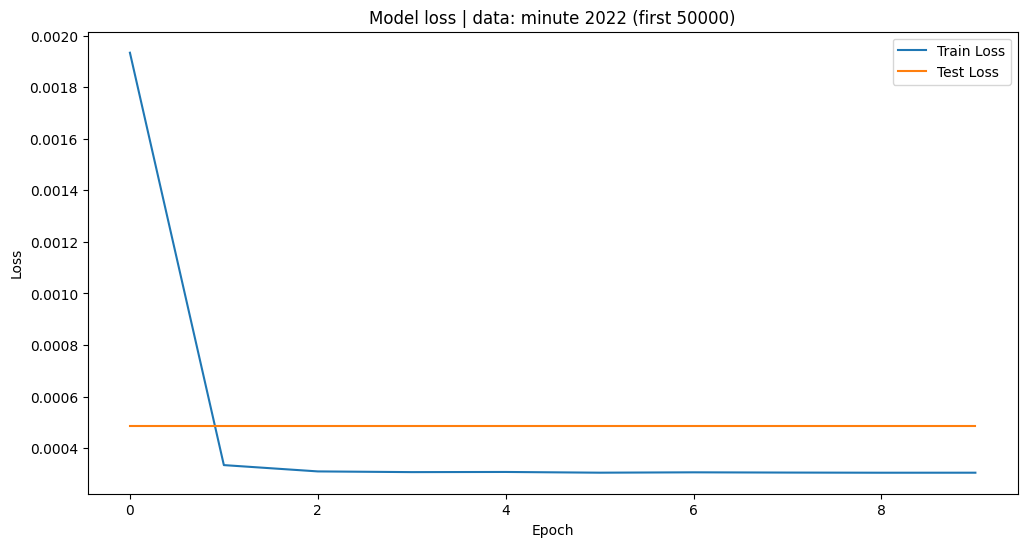

In [ ]:
# Plot training & validation loss values (learning curves)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model loss | data: minute 2022 (first 50000)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

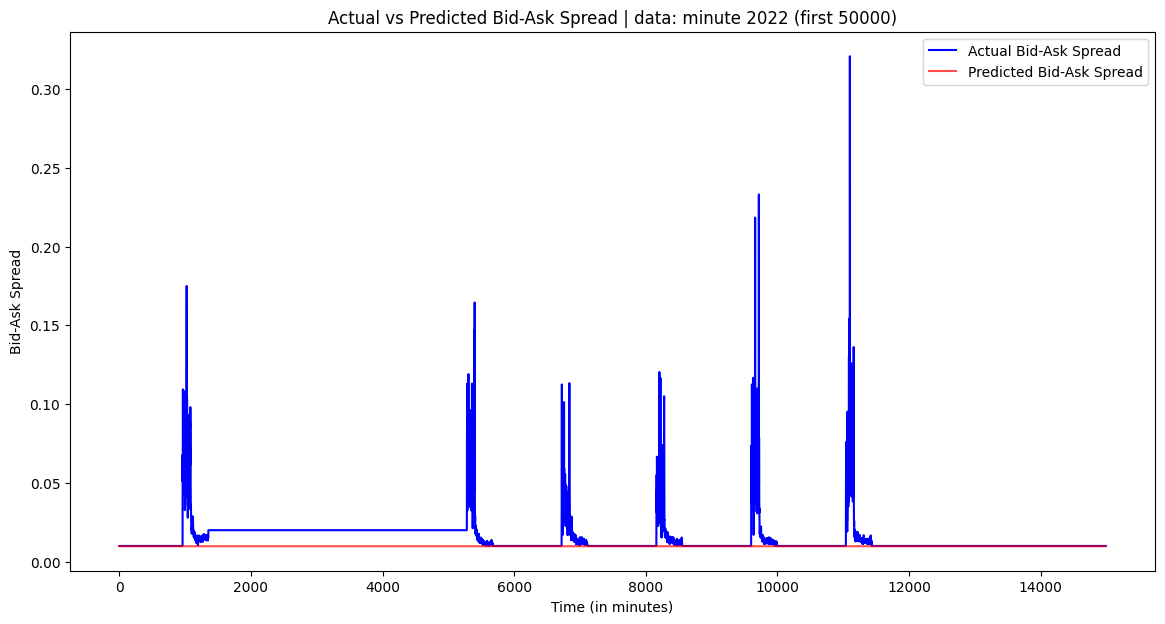

In [ ]:
# plotting predicted vs actual bid-ask spread

# If you've used a scaler, inverse transform the predicted and actual values
y_pred_original = scaler_y.inverse_transform(y_pred)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(y_test_original, label='Actual Bid-Ask Spread', color='blue')
plt.plot(y_pred_original, label='Predicted Bid-Ask Spread', color='red', alpha=0.7)
plt.title('Actual vs Predicted Bid-Ask Spread | data: minute 2022 (first 50000)')
plt.xlabel('Time (in minutes)')
plt.ylabel('Bid-Ask Spread')
plt.legend()
plt.show()


Hyperparameter tuning

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor

def create_model(dropout_rate=0.2, lstm_units=16, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units=lstm_units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=lstm_units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1, activation='linear'))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

model = KerasRegressor(build_fn=create_model, epochs=20, batch_size=64, verbose=0)

ModuleNotFoundError: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'dropout_rate': [0.1, 0.2, 0.3],
    'lstm_units': [16, 32, 64],
    'batch_size': [32, 64, 128],
    'optimizer': ['SGD', 'Adam']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)

In [ ]:
grid_result = grid.fit(X_train, y_train)

In [ ]:
print(f"Best Score: {grid_result.best_score_} using {grid_result.best_params_}")

# using random search test

In [ ]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 2.1 MB/s eta 0:00:00


In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

def build_model(hp):
    model = Sequential()

    model.add(LSTM(
        units=hp.Int('lstm_units_1', min_value=8, max_value=64, step=8),
        return_sequences=True,
        input_shape=(X_train.shape[1], X_train.shape[2])
    ))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(LSTM(units=hp.Int('lstm_units_2', min_value=8, max_value=64, step=8), return_sequences=False))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(Dense(units=1, activation='linear'))

    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd']),
        loss='mean_squared_error'
    )
    return model

<ipython-input-42-2361c3e7742a>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    directory='my_dir',
    project_name='helloworld'
)

In [ ]:
tuner.search(x=X_train, y=y_train,
             epochs=20,
             validation_split=0.3,
             batch_size=hp.Int('batch_size', min_value=32, max_value=256, step=32))


NameError: ignored

In [ ]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the optimal hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# hyperparameter tuning

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from kerastuner import RandomSearch

# Define a model-building function
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('lstm_units_1', min_value=8, max_value=128, step=8),
                   return_sequences=True,
                   input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(LSTM(units=hp.Int('lstm_units_2', min_value=8, max_value=128, step=8),
                   return_sequences=False))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(Dense(units=1, activation='linear'))

    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,  # Number of different hyperparameter combinations to try
    executions_per_trial=1,  # Number of times to train each model. Set to 1 so we only train each combination once.
    directory='tuning',  # Directory to store the logs and trained models
    project_name='b_a_spread_pred'  # Name for this tuning run. Useful if you run multiple tuning jobs.
)

# Search for the best hyperparameters
tuner.search(x=X_train, y=y_train, epochs=5, validation_split=0.3, batch_size=64)


Trial 5 Complete [00h 05m 28s]
val_loss: 0.00010845639189938083

Best val_loss So Far: 9.145847434410825e-05
Total elapsed time: 00h 18m 31s


In [ ]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print out the best hyperparameters
print(f"Best LSTM Units for First Layer: {best_hps.get('lstm_units_1')}")
print(f"Best Dropout Rate for First Layer: {best_hps.get('dropout_1')}")
print(f"Best LSTM Units for Second Layer: {best_hps.get('lstm_units_2')}")
print(f"Best Dropout Rate for Second Layer: {best_hps.get('dropout_2')}")

Best LSTM Units for First Layer: 104
Best Dropout Rate for First Layer: 0.1
Best LSTM Units for Second Layer: 112
Best Dropout Rate for Second Layer: 0.1


# Permutation importance

In [ ]:
from sklearn.metrics import mean_squared_error

class KerasRegressorWrapper:
    def __init__(self, model, scaler_X, sequence_length, feature_names):
        self.model = model
        self.scaler_X = scaler_X
        self.sequence_length = sequence_length
        self.feature_names = feature_names

    def fit(self, X, y):
        # Dummy fit method
        pass

    def predict(self, X):
        X_reshaped = X.reshape(-1, self.sequence_length, len(self.feature_names))
        X_scaled = self.scaler_X.transform(X_reshaped.reshape(-1, len(self.feature_names))).reshape(X_reshaped.shape)
        return self.model.predict(X_scaled).ravel()

    def score(self, X, y):
        y_pred = self.predict(X)
        # Return the negative mean squared error as the score
        return -mean_squared_error(y, y_pred)

# Now, let's wrap the model
wrapped_model = KerasRegressorWrapper(model, scaler_X, sequence_length, explanatory_variables)

# Calculate permutation importance on reshaped test data
X_test_reshaped = X_test.reshape(-1, sequence_length * len(explanatory_variables))
r = permutation_importance(wrapped_model, X_test_reshaped, y_test_original.ravel(), n_repeats=5, random_state=42)

# Display the importance scores for each feature
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        feature_name = explanatory_variables[i % len(explanatory_variables)]
        print(f"{feature_name:<35} Importance: {r.importances_mean[i]:.3f} +/- {r.importances_std[i]:.3f}")


469/469 [==============================] - 12s 25ms/step


KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import mean_squared_error

class KerasRegressorWrapper:
    def __init__(self, model, scaler_X, sequence_length, feature_names):
        self.model = model
        self.scaler_X = scaler_X
        self.sequence_length = sequence_length
        self.feature_names = feature_names

    def fit(self, X, y):
        # Dummy fit method
        pass

    def predict(self, X):
        X_reshaped = X.reshape(-1, self.sequence_length, len(self.feature_names))
        X_scaled = self.scaler_X.transform(X_reshaped.reshape(-1, len(self.feature_names))).reshape(X_reshaped.shape)
        return self.model.predict(X_scaled).ravel()

    def score(self, X, y):
        y_pred = self.predict(X)
        # Return the negative mean squared error as the score
        return -mean_squared_error(y, y_pred)

# Now, let's wrap the model
wrapped_model = KerasRegressorWrapper(model, scaler_X, sequence_length, explanatory_variables)

# Calculate permutation importance on reshaped test data
X_test_reshaped = X_test.reshape(-1, sequence_length * len(explanatory_variables))
r = permutation_importance(wrapped_model, X_test_reshaped, y_test_original.ravel(), n_repeats=2, random_state=42, n_jobs=1)

# Display the importance scores for each feature
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        feature_name = explanatory_variables[i % len(explanatory_variables)]
        print(f"{feature_name:<35} Importance: {r.importances_mean[i]:.3f} +/- {r.importances_std[i]:.3f}")


405/469 [========================>.....] - ETA: 1s

KeyboardInterrupt: ignored

In [ ]:
import shap

# Train your LSTM model first
# ...

# Create an explainer with a higher max_evals value
max_evals = 4000  # Set this to an appropriate value
explainer = shap.Explainer(model, masker=shap.maskers.Independent(X_train_scaled), max_evals=max_evals)

# Ensure X_test_scaled has the same number of features as X_train_scaled
X_test_scaled_corrected = X_test_scaled[:, :X_train_scaled.shape[2]]

# Calculate SHAP values for a specific sample (change the index)
sample_idx = 0
# Assuming X_test_scaled_corrected[sample_idx] is a single sequence, reshape it to (1, sequence_length, num_features)
shap_values = explainer.shap_values(X_test_scaled_corrected[sample_idx].reshape(1, sequence_length, X_train_scaled.shape[2]))

# Plot the summary plot for the sample
shap.summary_plot(shap_values[0], features=X_test_scaled_corrected[sample_idx], feature_names=explanatory_variables)


ValueError: ignored

# ANALYSIS

In [ ]:
DL_nbbo_aapl_agg_min_2022_50000_analysis = DL_nbbo_aapl_agg_min_2022_50000.copy()
DL_nbbo_aapl_agg_min_2022_50000_analysis

,Unnamed: 0,Bid-price Open,Ask-price Open,Bid-price High,Ask-price High,Bid-price Low,Ask-price Low,Bid-price Close,Ask-price Close,Bid-size,...,Ask-price Open_rolling_std_30,Bid-price Close_rolling_mean_30,Bid-price Close_rolling_std_30,Ask-price Close_rolling_mean_30,Ask-price Close_rolling_std_30,SMA_5,SMA_10,Spread_Percentage,Bid_Ask_Size_Interaction,Bid_Ask_Price_Interaction
29,1389.5,178.210000,178.250000,178.210000,178.250000,178.205000,178.250000,178.205000,178.250000,4.500000,...,0.036802,178.201306,0.039288,178.242329,0.037333,178.229150,178.237742,0.000252,1.012500e+01,31765.041250
30,1398.5,178.222143,178.252143,178.225000,178.254286,178.215000,178.250000,178.217857,178.252143,11.714286,...,0.036381,178.202568,0.039188,178.243679,0.036915,178.231400,178.236992,0.000192,3.037347e+02,31767.714931
31,1408.5,178.223333,178.258333,178.223333,178.258333,178.220000,178.253333,178.220000,178.253333,2.833333,...,0.034859,178.205022,0.037829,178.246184,0.034807,178.234333,178.236242,0.000187,3.447222e+01,31768.309067
32,1415.0,178.208571,178.237143,178.212857,178.242857,178.208571,178.235714,178.212857,178.241429,11.142857,...,0.030971,178.208534,0.033052,178.248940,0.030673,178.233262,178.234956,0.000160,1.034694e+02,31764.914247
33,1422.5,178.237500,178.273750,178.237500,178.277500,178.237500,178.272500,178.237500,178.276250,4.000000,...,0.027793,178.212154,0.029817,178.252296,0.027735,178.236637,178.236143,0.000217,1.500000e+01,31775.513109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100024,246674.0,156.090000,156.100000,156.090000,156.100000,156.010000,156.020000,156.010000,156.020000,3517.000000,...,0.000000,156.010000,0.000000,156.020000,0.000000,156.015000,156.015000,0.000064,4.631889e+06,24340.680200
100025,246674.0,156.090000,156.100000,156.090000,156.100000,156.010000,156.020000,156.010000,156.020000,3517.000000,...,0.000000,156.010000,0.000000,156.020000,0.000000,156.015000,156.015000,0.000064,4.631889e+06,24340.680200
100026,246674.0,156.090000,156.100000,156.090000,156.100000,156.010000,156.020000,156.010000,156.020000,3517.000000,...,0.000000,156.010000,0.000000,156.020000,0.000000,156.015000,156.015000,0.000064,4.631889e+06,24340.680200
100027,246674.0,156.090000,156.100000,156.090000,156.100000,156.010000,156.020000,156.010000,156.020000,3517.000000,...,0.000000,156.010000,0.000000,156.020000,0.000000,156.015000,156.015000,0.000064,4.631889e+06,24340.680200


In [ ]:
# Extract the last sequence from each sample in X_test
X_test_last_sequence = X_test[:, -1, :]

# Convert X_test_df to a DataFrame
X_test_df = pd.DataFrame(X_test_last_sequence, columns=explanatory_variables)

# Convert y_test to a DataFrame
y_test_df = pd.DataFrame(y_test, columns=['Bid-Ask Spread Close'])

# Concatenate
test_df = pd.concat([X_test_df, y_test_df], axis=1)

In [ ]:
test_df

,Bid-price Open,Ask-price Open,Bid-price High,Ask-price High,Bid-price Low,Ask-price Low,Bid-price Close,Ask-price Close,Bid-size,Ask-size,...,Bid-price Close_rolling_mean_30,Bid-price Close_rolling_std_30,Ask-price Close_rolling_mean_30,Ask-price Close_rolling_std_30,SMA_5,SMA_10,Spread_Percentage,Bid_Ask_Size_Interaction,Bid_Ask_Price_Interaction,Bid-Ask Spread Close
0,173.33,173.34,173.39,173.4,173.32,173.33,173.39,173.40,1206.0,1611.0,...,173.39,0.0,173.40,0.0,173.395,173.395,0.000058,1942866.0,30065.8260,0.01
1,173.33,173.34,173.39,173.4,173.32,173.33,173.39,173.40,1206.0,1611.0,...,173.39,0.0,173.40,0.0,173.395,173.395,0.000058,1942866.0,30065.8260,0.01
2,173.33,173.34,173.39,173.4,173.32,173.33,173.39,173.40,1206.0,1611.0,...,173.39,0.0,173.40,0.0,173.395,173.395,0.000058,1942866.0,30065.8260,0.01
3,173.33,173.34,173.39,173.4,173.32,173.33,173.39,173.40,1206.0,1611.0,...,173.39,0.0,173.40,0.0,173.395,173.395,0.000058,1942866.0,30065.8260,0.01
4,173.33,173.34,173.39,173.4,173.32,173.33,173.39,173.40,1206.0,1611.0,...,173.39,0.0,173.40,0.0,173.395,173.395,0.000058,1942866.0,30065.8260,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49965,156.09,156.10,156.09,156.1,156.01,156.02,156.01,156.02,3517.0,1317.0,...,156.01,0.0,156.02,0.0,156.015,156.015,0.000064,4631889.0,24340.6802,0.01
49966,156.09,156.10,156.09,156.1,156.01,156.02,156.01,156.02,3517.0,1317.0,...,156.01,0.0,156.02,0.0,156.015,156.015,0.000064,4631889.0,24340.6802,0.01
49967,156.09,156.10,156.09,156.1,156.01,156.02,156.01,156.02,3517.0,1317.0,...,156.01,0.0,156.02,0.0,156.015,156.015,0.000064,4631889.0,24340.6802,0.01
49968,156.09,156.10,156.09,156.1,156.01,156.02,156.01,156.02,3517.0,1317.0,...,156.01,0.0,156.02,0.0,156.015,156.015,0.000064,4631889.0,24340.6802,0.01


In [ ]:
test_df['predicted_spread'] = model.predict(X_test_scaled)

1562/1562 [==============================] - 20s 13ms/step


In [ ]:
# Compute the error
test_df['error'] = abs(test_df['predicted_spread'] - test_df['Bid-Ask Spread Close'])

In [ ]:
quantiles = test_df['Bid-Ask Spread Close'].quantile([0.33, 0.66])

def segment_liquidity(val):
    if val <= quantiles.iloc[0]:
        return 'High liquidity'
    elif val <= quantiles.iloc[1]:
        return 'Medium liquidity'
    else:
        return 'Low liquidity'

test_df['liquidity_segment'] = test_df['Bid-Ask Spread Close'].apply(segment_liquidity)

In [ ]:
test_df

,Bid-price Open,Ask-price Open,Bid-price High,Ask-price High,Bid-price Low,Ask-price Low,Bid-price Close,Ask-price Close,Bid-size,Ask-size,...,Ask-price Close_rolling_std_30,SMA_5,SMA_10,Spread_Percentage,Bid_Ask_Size_Interaction,Bid_Ask_Price_Interaction,Bid-Ask Spread Close,predicted_spread,error,liquidity_segment
0,173.33,173.34,173.39,173.4,173.32,173.33,173.39,173.40,1206.0,1611.0,...,0.0,173.395,173.395,0.000058,1942866.0,30065.8260,0.01,0.009936,0.000064,Medium liquidity
1,173.33,173.34,173.39,173.4,173.32,173.33,173.39,173.40,1206.0,1611.0,...,0.0,173.395,173.395,0.000058,1942866.0,30065.8260,0.01,0.009936,0.000064,Medium liquidity
2,173.33,173.34,173.39,173.4,173.32,173.33,173.39,173.40,1206.0,1611.0,...,0.0,173.395,173.395,0.000058,1942866.0,30065.8260,0.01,0.009936,0.000064,Medium liquidity
3,173.33,173.34,173.39,173.4,173.32,173.33,173.39,173.40,1206.0,1611.0,...,0.0,173.395,173.395,0.000058,1942866.0,30065.8260,0.01,0.009936,0.000064,Medium liquidity
4,173.33,173.34,173.39,173.4,173.32,173.33,173.39,173.40,1206.0,1611.0,...,0.0,173.395,173.395,0.000058,1942866.0,30065.8260,0.01,0.009936,0.000064,Medium liquidity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49965,156.09,156.10,156.09,156.1,156.01,156.02,156.01,156.02,3517.0,1317.0,...,0.0,156.015,156.015,0.000064,4631889.0,24340.6802,0.01,0.012107,0.002107,Medium liquidity
49966,156.09,156.10,156.09,156.1,156.01,156.02,156.01,156.02,3517.0,1317.0,...,0.0,156.015,156.015,0.000064,4631889.0,24340.6802,0.01,0.012107,0.002107,Medium liquidity
49967,156.09,156.10,156.09,156.1,156.01,156.02,156.01,156.02,3517.0,1317.0,...,0.0,156.015,156.015,0.000064,4631889.0,24340.6802,0.01,0.012107,0.002107,Medium liquidity
49968,156.09,156.10,156.09,156.1,156.01,156.02,156.01,156.02,3517.0,1317.0,...,0.0,156.015,156.015,0.000064,4631889.0,24340.6802,0.01,0.012107,0.002107,Medium liquidity


In [ ]:
grouped = test_df.groupby('liquidity_segment')['error']

error_stats = {
    'Mean': grouped.mean(),
    'Standard Deviation': grouped.std(),
    'Median': grouped.median(),
    'IQR': grouped.quantile(0.75) - grouped.quantile(0.25)
}

error_stats_df = pd.DataFrame(error_stats)
error_stats_df

,Mean,Standard Deviation,Median,IQR
liquidity_segment,,,,
High liquidity,0.000691,0.001013,0.000271,0.000201
Low liquidity,0.005662,0.011066,0.003144,0.003197
Medium liquidity,0.001209,0.000846,0.001244,0.001846


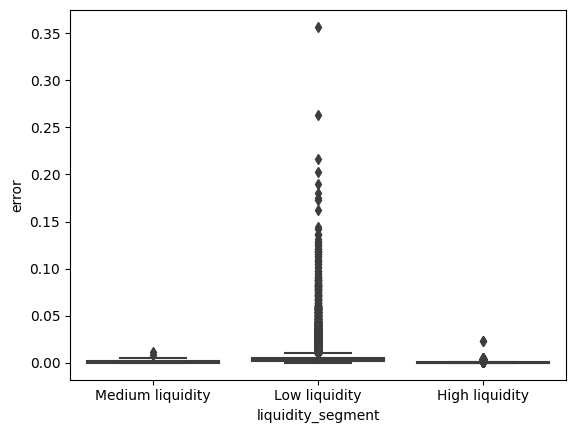

In [ ]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=test_df, x='liquidity_segment', y='error')
plt.show()

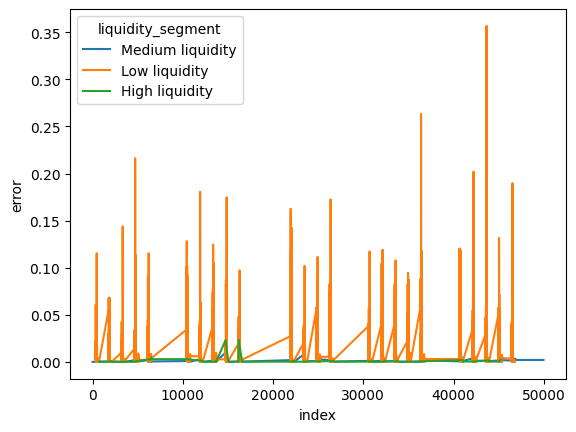

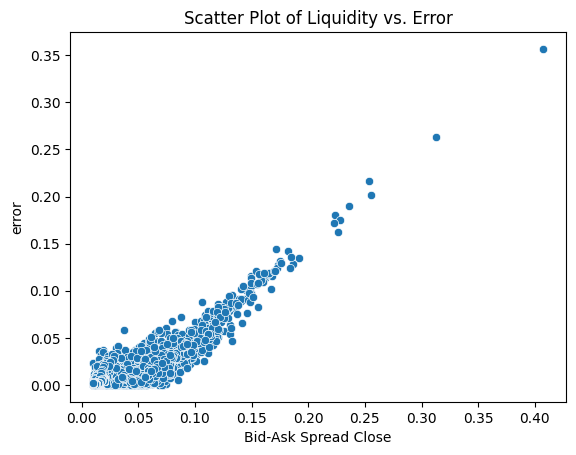

In [ ]:
test_df_reset = test_df.reset_index()


# Error Trend Over Time
sns.lineplot(data=test_df_reset, x='index', y='error', hue='liquidity_segment')
plt.show()

# Scatter Plot of Liquidity vs. Error
sns.scatterplot(data=test_df, x='Bid-Ask Spread Close', y='error')
plt.title('Scatter Plot of Liquidity vs. Error')
plt.show()

In [ ]:
# Assuming 'spread' is the column name for bid-ask spread
narrow_spread_periods = test_df[test_df['Bid-Ask Spread Close'] < test_df['Bid-Ask Spread Close'].quantile(0.33)]
wide_spread_periods = test_df[test_df['Bid-Ask Spread Close'] > test_df['Bid-Ask Spread Close'].quantile(0.66)]

# Analyze actual liquidity during these periods
narrow_liquidity_avg = narrow_spread_periods['predicted_spread'].mean()
wide_liquidity_avg = wide_spread_periods['predicted_spread'].mean()

print(f"Average liquidity during narrow spread periods: {narrow_liquidity_avg}")
print(f"Average liquidity during wide spread periods: {wide_liquidity_avg}")

Average liquidity during narrow spread periods: 0.010269977152347565
Average liquidity during wide spread periods: 0.02008187584578991


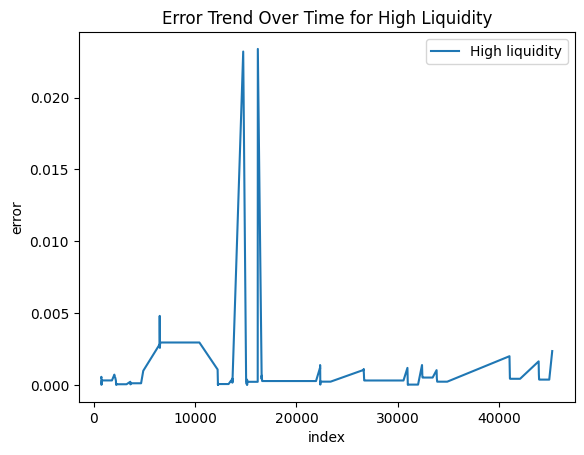

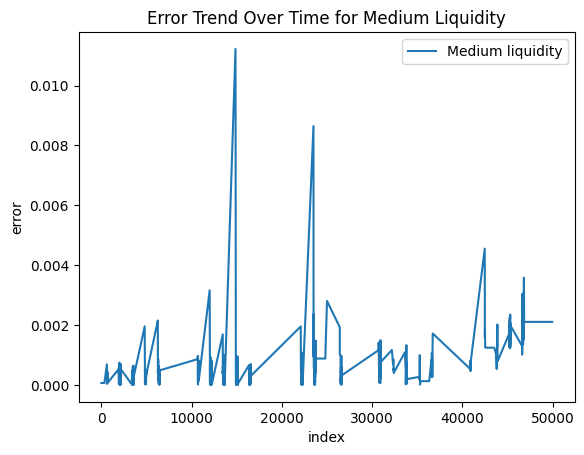

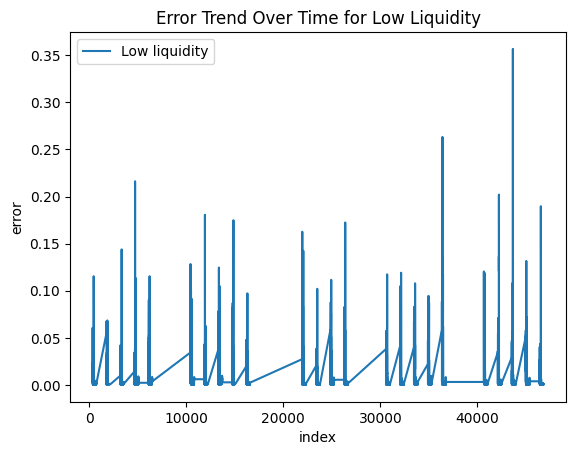

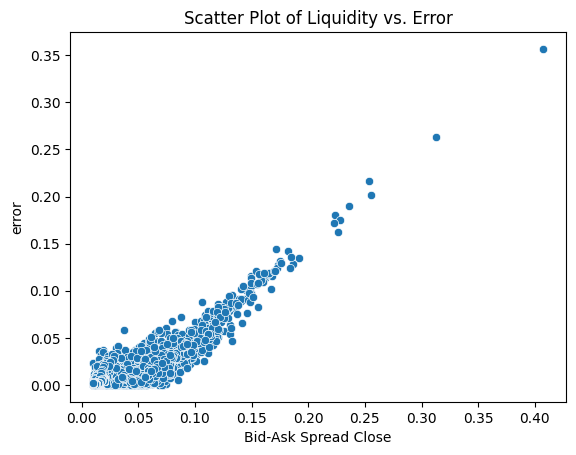

In [ ]:
# Error Trend Over Time for High Liquidity
high_liquidity_df = test_df_reset[test_df_reset['liquidity_segment'] == 'High liquidity']
sns.lineplot(data=high_liquidity_df, x='index', y='error', label='High liquidity')
plt.title('Error Trend Over Time for High Liquidity')
plt.show()

# Error Trend Over Time for Medium Liquidity
medium_liquidity_df = test_df_reset[test_df_reset['liquidity_segment'] == 'Medium liquidity']
sns.lineplot(data=medium_liquidity_df, x='index', y='error', label='Medium liquidity')
plt.title('Error Trend Over Time for Medium Liquidity')
plt.show()

# Error Trend Over Time for Low Liquidity
low_liquidity_df = test_df_reset[test_df_reset['liquidity_segment'] == 'Low liquidity']
sns.lineplot(data=low_liquidity_df, x='index', y='error', label='Low liquidity')
plt.title('Error Trend Over Time for Low Liquidity')
plt.show()

# Scatter Plot of Liquidity vs. Error
sns.scatterplot(data=test_df, x='Bid-Ask Spread Close', y='error')
plt.title('Scatter Plot of Liquidity vs. Error')
plt.show()

# FURTHER ANALYSIS

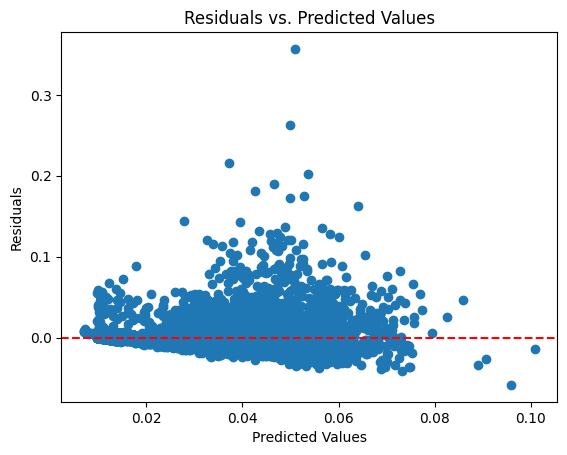

In [ ]:
# Residual Plot:
residuals = test_df['Bid-Ask Spread Close'] - test_df['predicted_spread']
plt.scatter(test_df['predicted_spread'], residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

<ipython-input-42-334d243a8e3c>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([test_df['Bid-Ask Spread Close'].min(), test_df['Bid-Ask Spread Close'].max()], [test_df['Bid-Ask Spread Close'].min(), test_df['Bid-Ask Spread Close'].max()], 'k--', color='red')


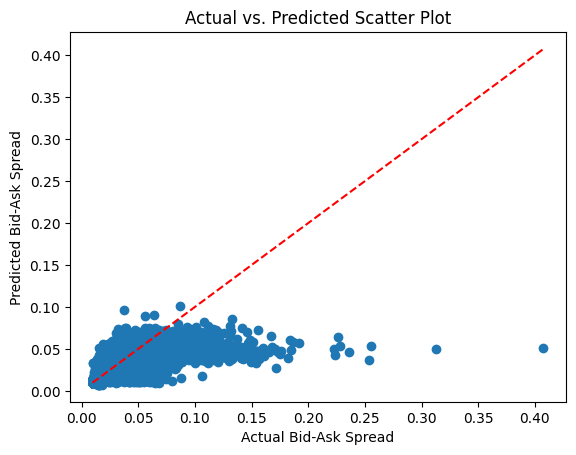

In [ ]:
# Scatter Plot:
plt.scatter(test_df['Bid-Ask Spread Close'], test_df['predicted_spread'])
plt.plot([test_df['Bid-Ask Spread Close'].min(), test_df['Bid-Ask Spread Close'].max()], [test_df['Bid-Ask Spread Close'].min(), test_df['Bid-Ask Spread Close'].max()], 'k--', color='red')
plt.title('Actual vs. Predicted Scatter Plot')
plt.xlabel('Actual Bid-Ask Spread')
plt.ylabel('Predicted Bid-Ask Spread')
plt.show()

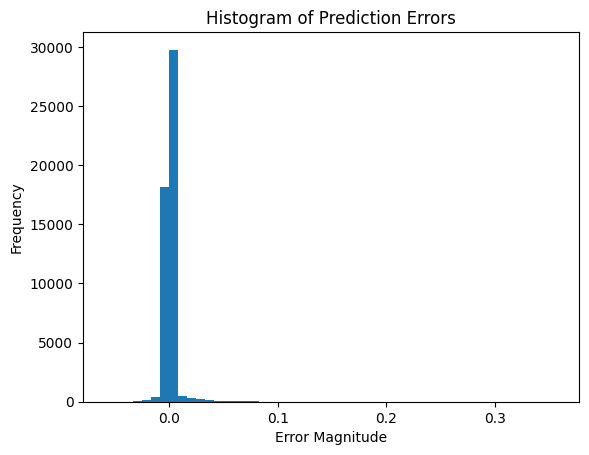

In [ ]:
#Histogram of Errors:
plt.hist(residuals, bins=50)
plt.title('Histogram of Prediction Errors')
plt.xlabel('Error Magnitude')
plt.ylabel('Frequency')
plt.show()

In [ ]:
cluster = test_df.copy()
cluster = cluster.drop('liquidity_segment', axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


           count      mean       std       min   25%       50%   75%       max
Cluster                                                                       
0        22739.0  0.018197  0.017685  0.009661  0.01  0.010833  0.02  0.407619
1         4217.0  0.010015  0.000594  0.010000  0.01  0.010000  0.01  0.047500
2         8903.0  0.010036  0.000893  0.010000  0.01  0.010000  0.01  0.067714
3         3935.0  0.010014  0.000616  0.010000  0.01  0.010000  0.01  0.047333
4        10176.0  0.015192  0.004871  0.010000  0.01  0.015500  0.02  0.050556


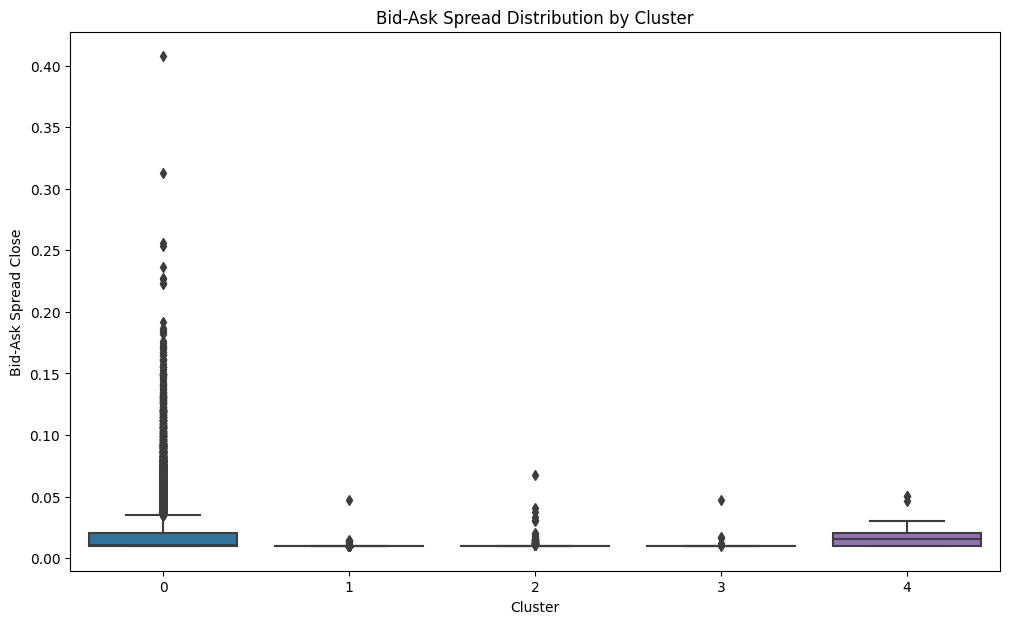

In [ ]:
from sklearn.cluster import KMeans
n_clusters = 5  # You can use the Elbow method or Silhouette analysis to find an optimal value
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(cluster)
cluster['Cluster'] = kmeans.labels_

# Analyzing Clusters
cluster_summary = cluster.groupby('Cluster')['Bid-Ask Spread Close'].describe()

print(cluster_summary)

# Plotting
plt.figure(figsize=(12, 7))
sns.boxplot(x='Cluster', y='Bid-Ask Spread Close', data=cluster)
plt.title('Bid-Ask Spread Distribution by Cluster')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

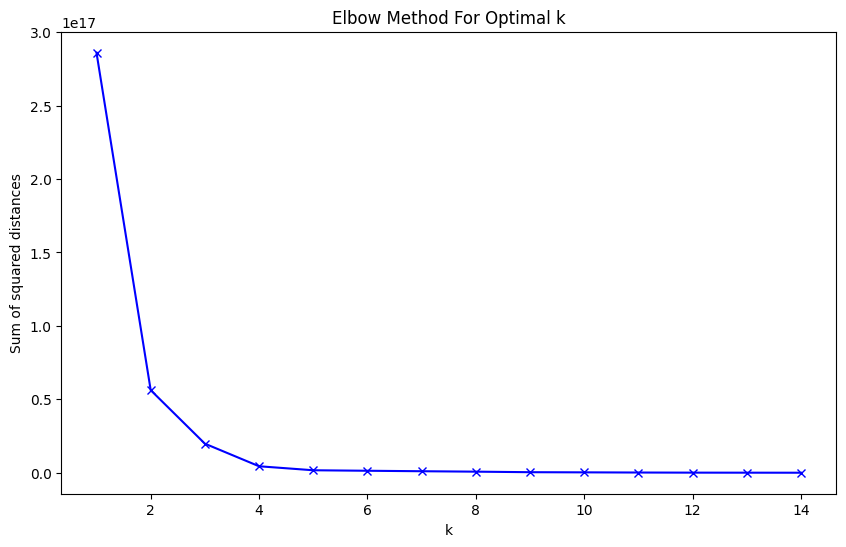

In [ ]:
"""
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    'Liquidity': np.random.rand(100),
    'Bid-Ask Spread': np.random.rand(100)
}
df = pd.DataFrame(data)

# Preprocessing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
"""

# Calculate sum of squared distances for a range of k values
sum_of_squared_distances = []
K = range(1, 15)  # Adjust the range as per your data and requirement
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(cluster)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Based on the elbow plot, you can then decide an optimal number for k and proceed with your clustering as in the code you provided.

In [ ]:
selected_features = ['Bid-Ask Spread Close', 'Bid-size', 'Ask-size', 'Order Imbalance', 'Quotes-count']

cluster_df = test_df[selected_features]

inertia = []
for i in range(1, 20): # checking for up to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=0).fit(cluster_df)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

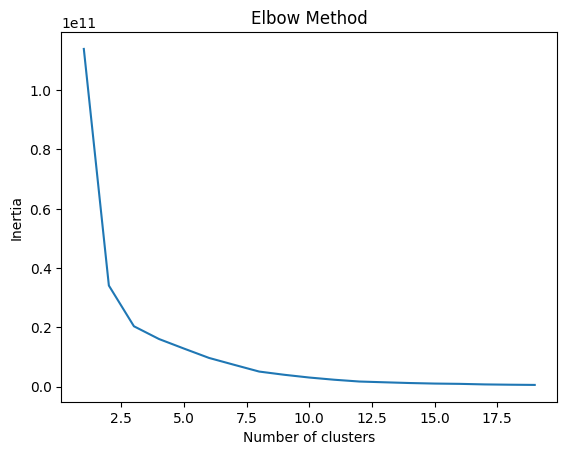

In [ ]:
plt.plot(range(1, 20), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
k_optimal = 8
kmeans = KMeans(n_clusters=k_optimal, random_state=0).fit(cluster_df)
cluster_df['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-70-9b747f36577c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['Cluster'] = kmeans.labels_


In [ ]:
cluster_summary = cluster_df.groupby('Cluster')[selected_features].mean()
print(cluster_summary)

         Bid-Ask Spread Close      Bid-size      Ask-size  Order Imbalance  \
Cluster                                                                      
0                    0.010009   3518.800403   1314.837185      2203.963218   
1                    0.015165    797.650863   1020.119091      -222.468228   
2                    0.018680    377.933239    374.711758         3.221481   
3                    0.010035   1365.973541   1504.176990      -138.203449   
4                    0.013373   1350.188308    525.499348       824.688959   
5                    0.010009   3774.000000   2302.000000      1472.000000   
6                    0.010333  31372.108333    634.408333     30737.700000   
7                    0.014625    561.941667  17670.525000    -17108.583333   

         Quotes-count  
Cluster                
0          289.479944  
1          209.908805  
2           88.669290  
3          252.543549  
4          154.674113  
5          772.000000  
6          114.883333  
7  

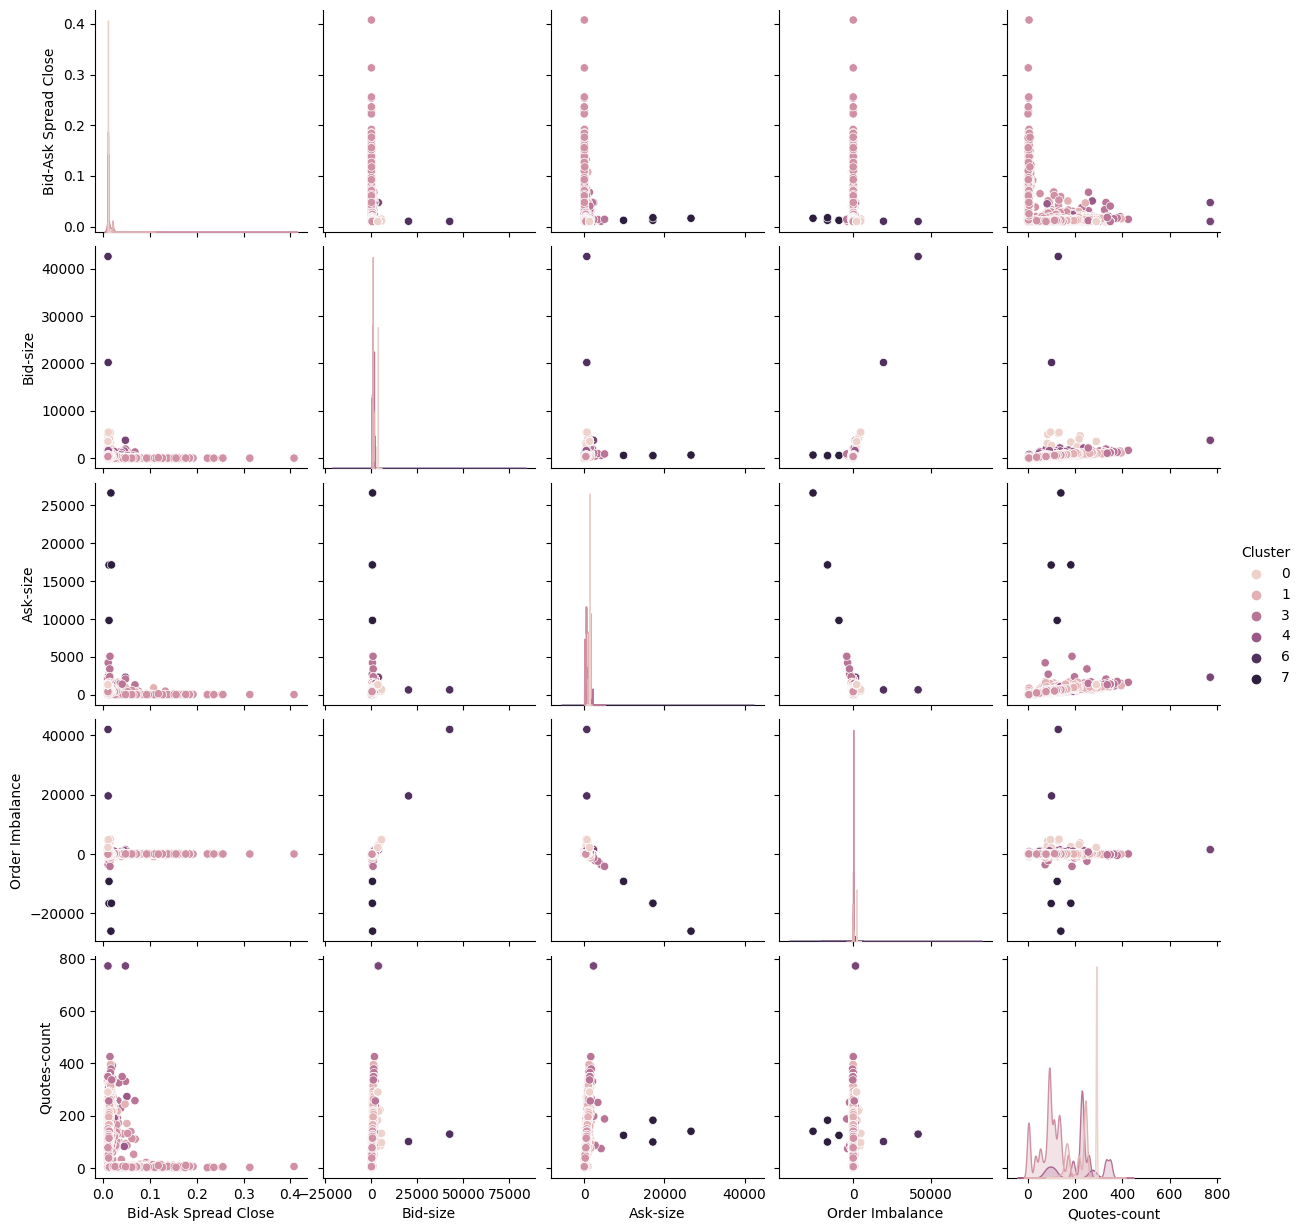

In [ ]:
sns.pairplot(cluster_df, hue='Cluster', vars=selected_features)
plt.show()

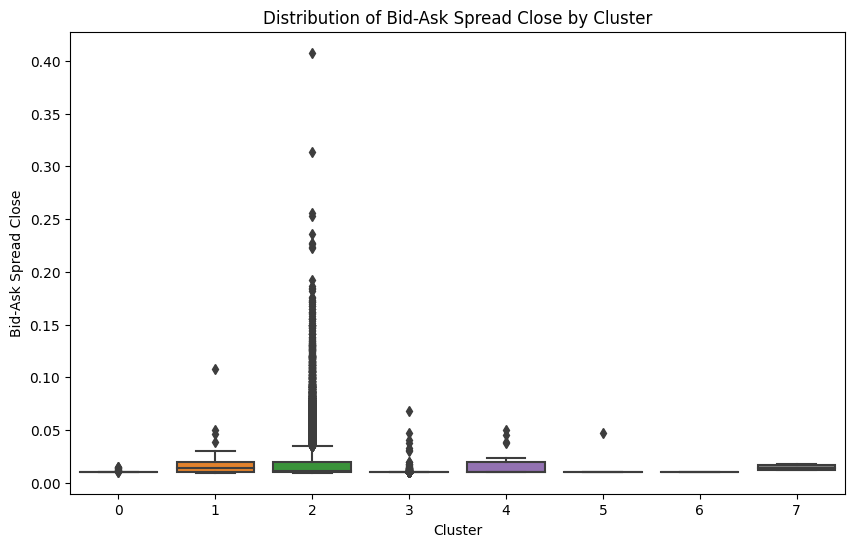

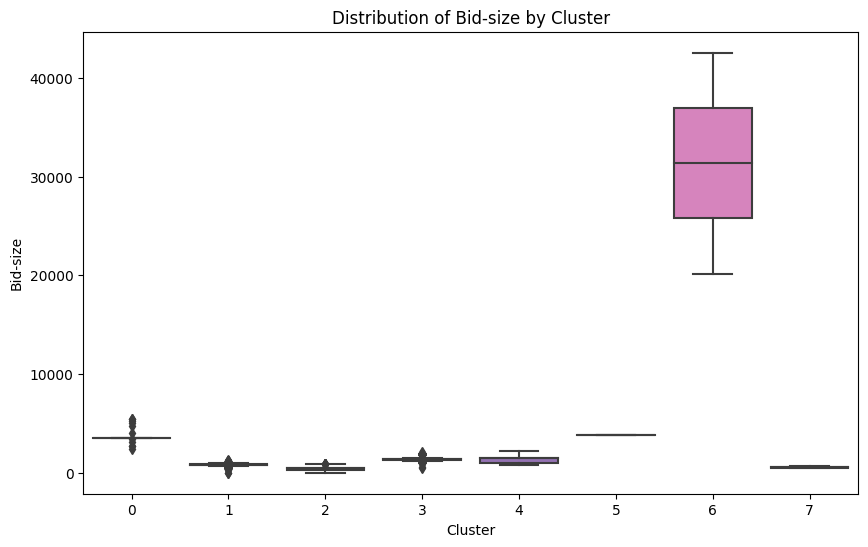

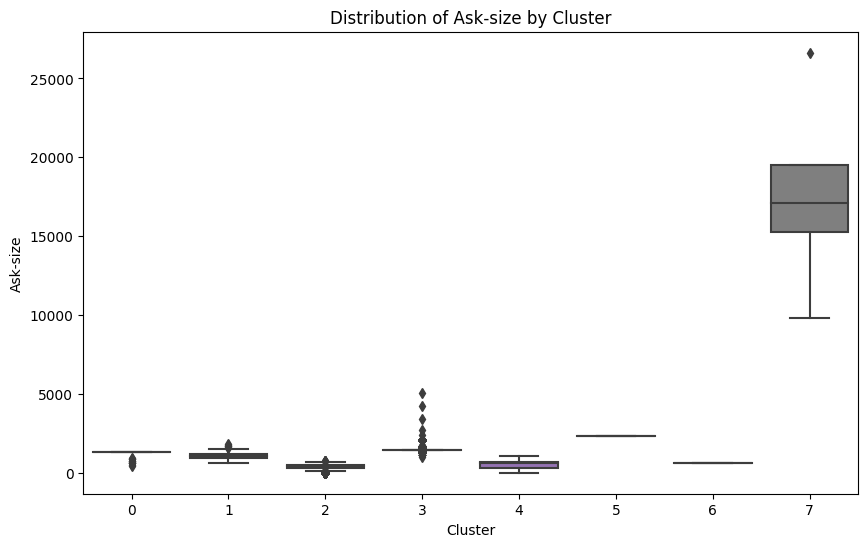

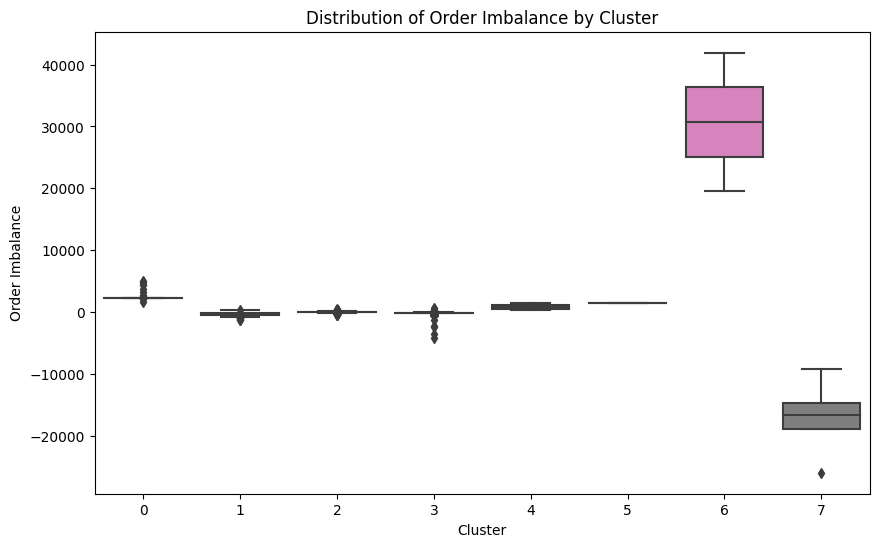

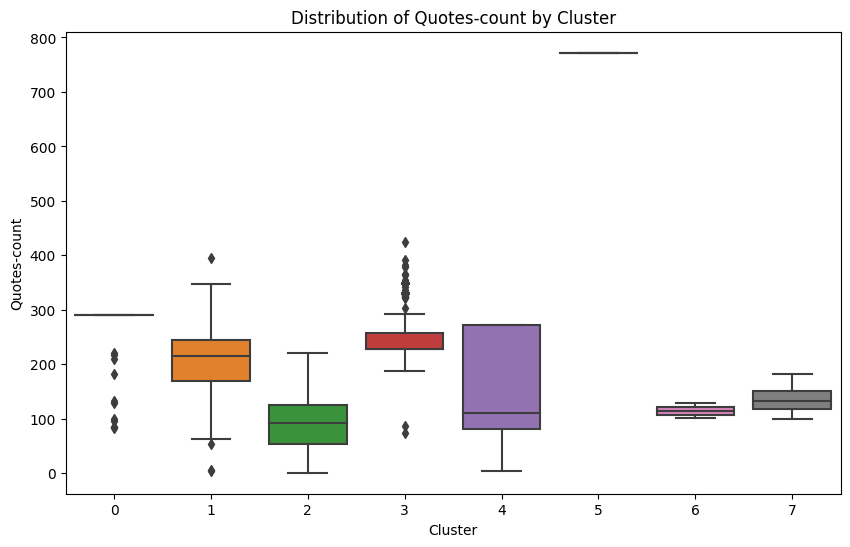

In [ ]:
# Box Plots for feature distribution across clusters
for column in cluster_df.columns:
    if column != 'Cluster':
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Cluster', y=column, data=cluster_df)
        plt.title(f'Distribution of {column} by Cluster')
        plt.show()

# EVENT STUDY

In [ ]:
import yfinance as yf

# Downloading AAPL data for 2022
data = yf.download('AAPL', start='2022-01-01', end='2022-12-31')

# Checking the head of the dataset
print(data.head())

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  180.190979   
2022-01-04  182.630005  182.940002  179.119995  179.699997  177.904037   
2022-01-05  179.610001  180.169998  174.639999  174.919998  173.171844   
2022-01-06  172.699997  175.300003  171.639999  172.000000  170.281006   
2022-01-07  172.889999  174.139999  171.029999  172.169998  170.449310   

               Volume  
Date                   
2022-01-03  104487900  
2022-01-04   99310400  
2022-01-05   94537600  
2022-01-06   96904000  
2022-01-07   86709100  


# extra observations

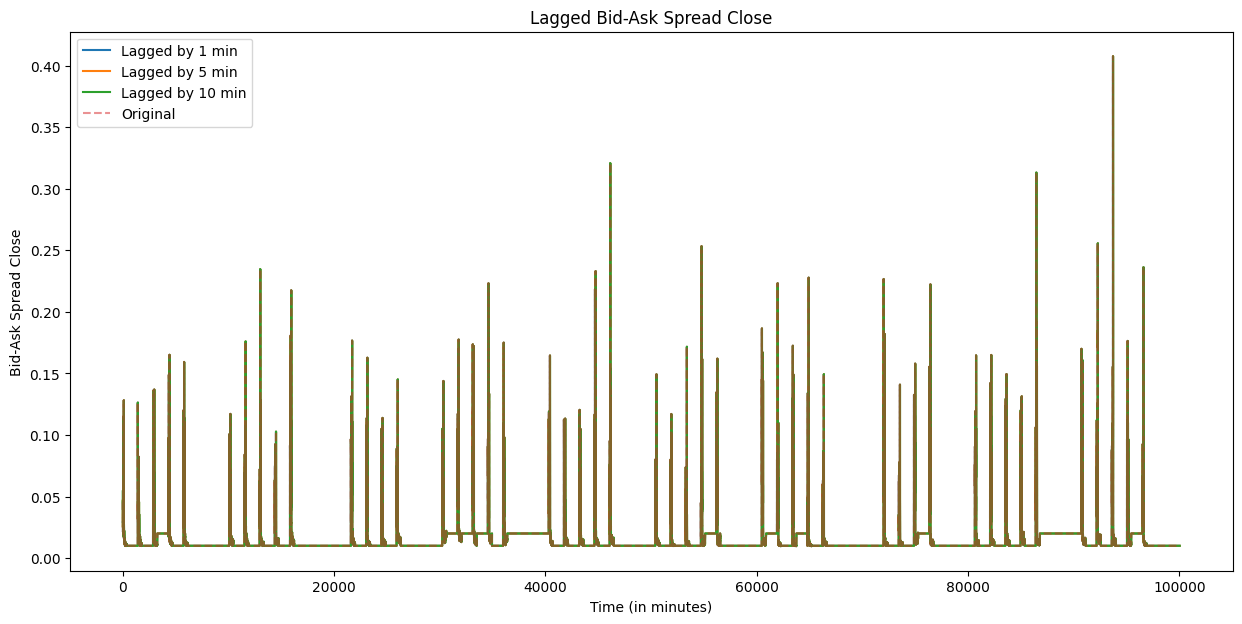

In [ ]:
plt.figure(figsize=(15, 7))
for lag in lags:
    plt.plot(DL_nbbo_aapl_agg_min_2022_50000[f'Bid-Ask Spread Close_lag_{lag}'], label=f'Lagged by {lag} min')
plt.plot(DL_nbbo_aapl_agg_min_2022_50000['Bid-Ask Spread Close'], label='Original', alpha=0.5, linestyle='--')
plt.legend()
plt.title('Lagged Bid-Ask Spread Close')
plt.xlabel('Time (in minutes)')
plt.ylabel('Bid-Ask Spread Close')
plt.show()

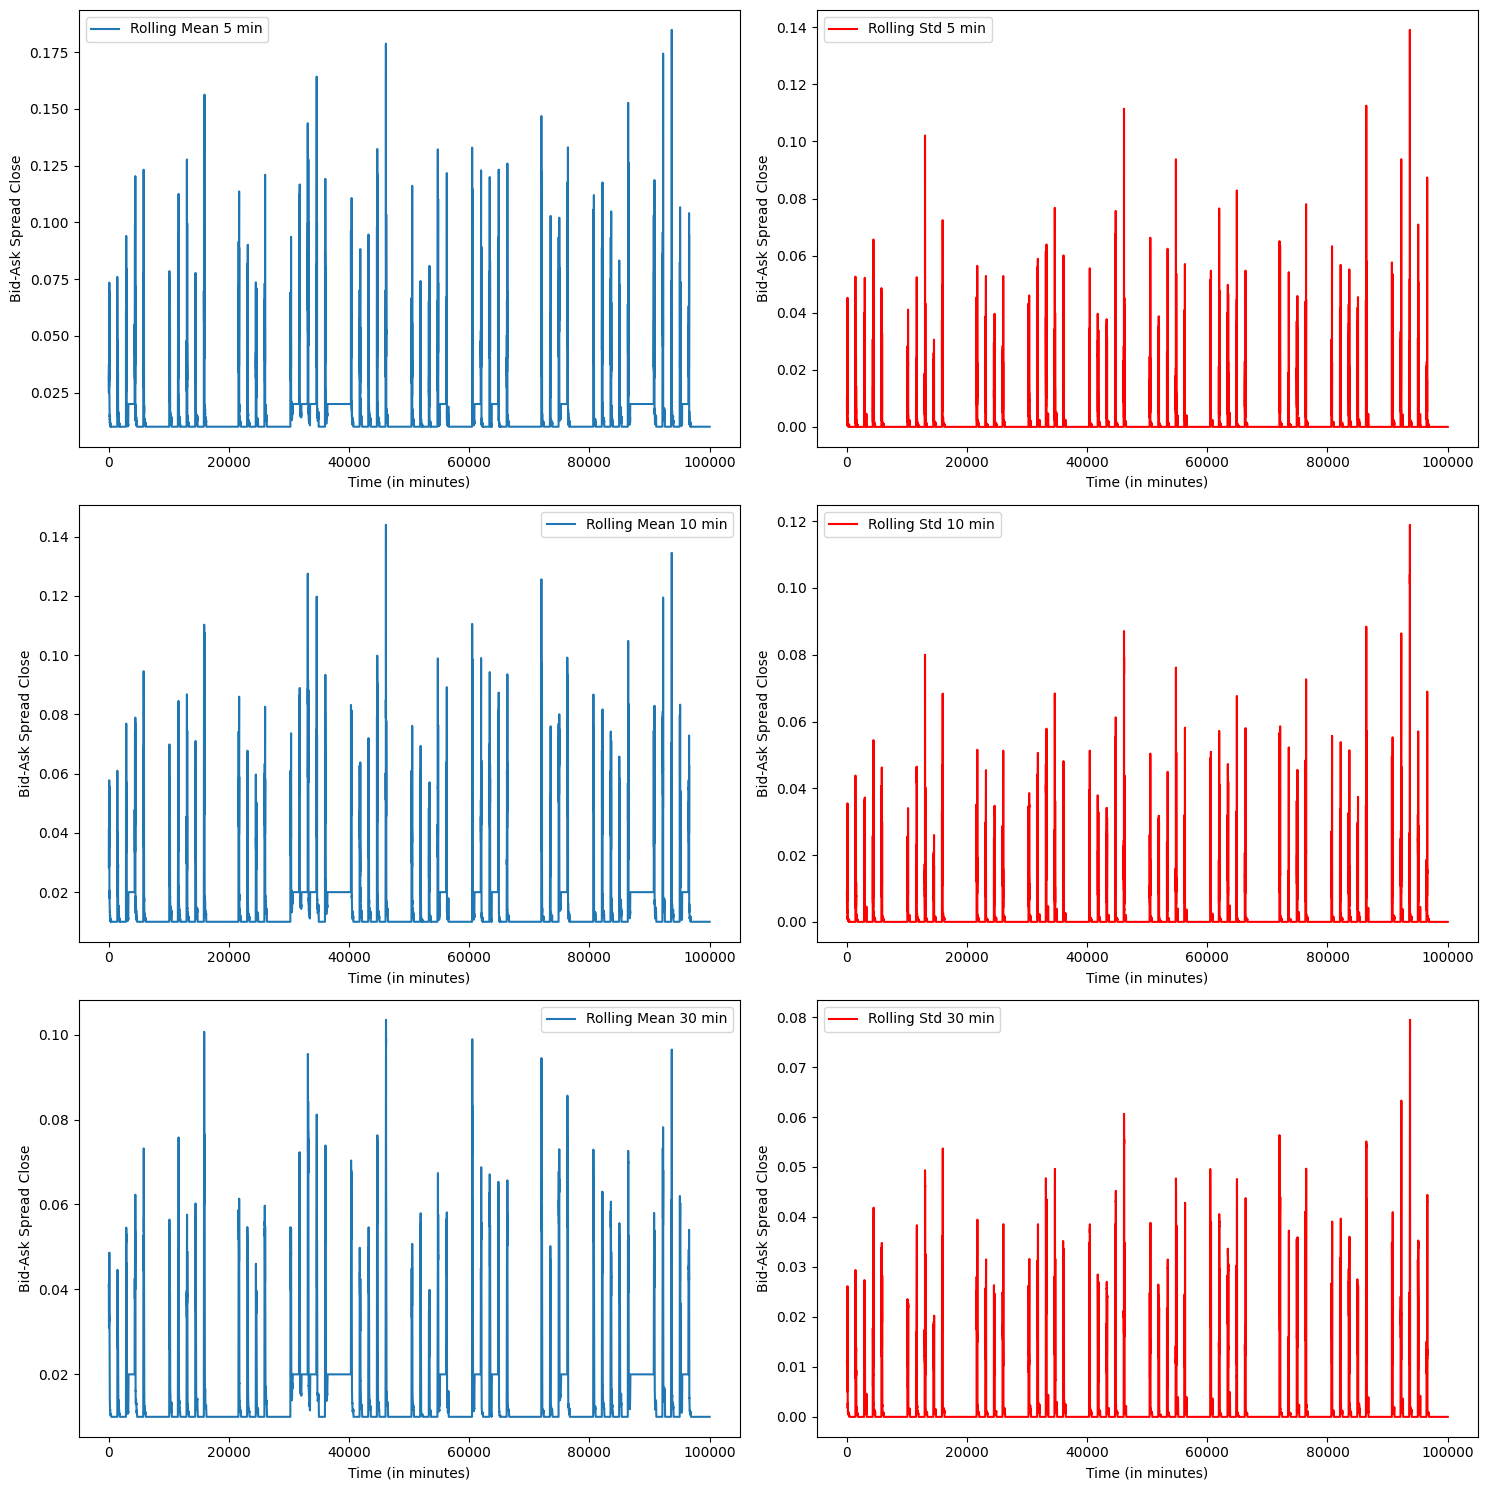

In [ ]:
fig, axes = plt.subplots(len(windows), 2, figsize=(15, 15))
for idx, window in enumerate(windows):
    axes[idx, 0].plot(DL_nbbo_aapl_agg_min_2022_50000[f'Bid-Ask Spread Close_rolling_mean_{window}'], label=f'Rolling Mean {window} min')
    axes[idx, 1].plot(DL_nbbo_aapl_agg_min_2022_50000[f'Bid-Ask Spread Close_rolling_std_{window}'], label=f'Rolling Std {window} min', color='red')
    for ax in axes[idx]:
        ax.legend()
        ax.set_xlabel('Time (in minutes)')
        ax.set_ylabel('Bid-Ask Spread Close')
plt.tight_layout()
plt.show()


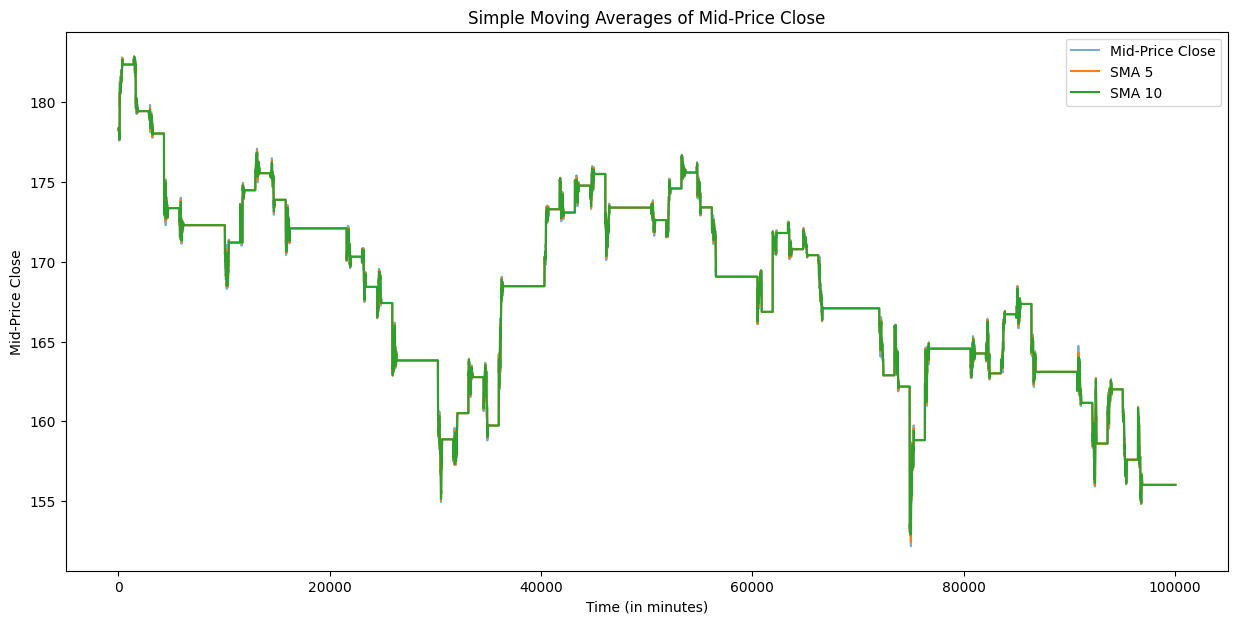

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(DL_nbbo_aapl_agg_min_2022_50000['Mid-Price Close'], label='Mid-Price Close', alpha=0.6)
plt.plot(DL_nbbo_aapl_agg_min_2022_50000['SMA_5'], label='SMA 5')
plt.plot(DL_nbbo_aapl_agg_min_2022_50000['SMA_10'], label='SMA 10')
plt.legend()
plt.title('Simple Moving Averages of Mid-Price Close')
plt.xlabel('Time (in minutes)')
plt.ylabel('Mid-Price Close')
plt.show()


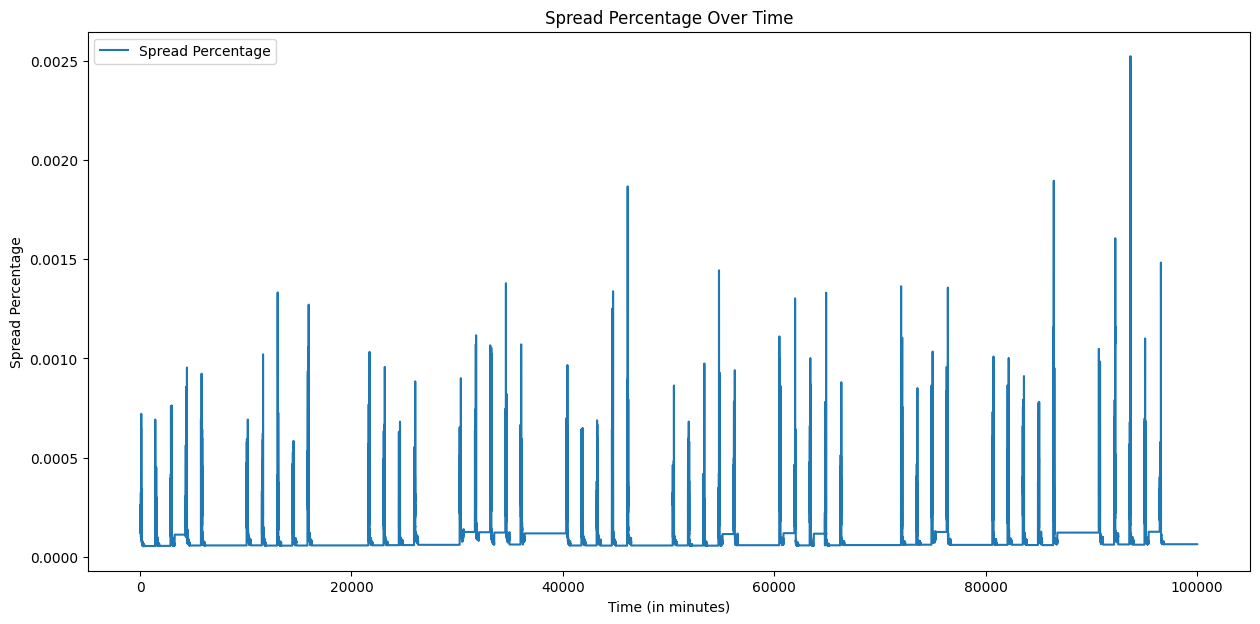

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(DL_nbbo_aapl_agg_min_2022_50000['Spread_Percentage'], label='Spread Percentage')
plt.legend()
plt.title('Spread Percentage Over Time')
plt.xlabel('Time (in minutes)')
plt.ylabel('Spread Percentage')
plt.show()


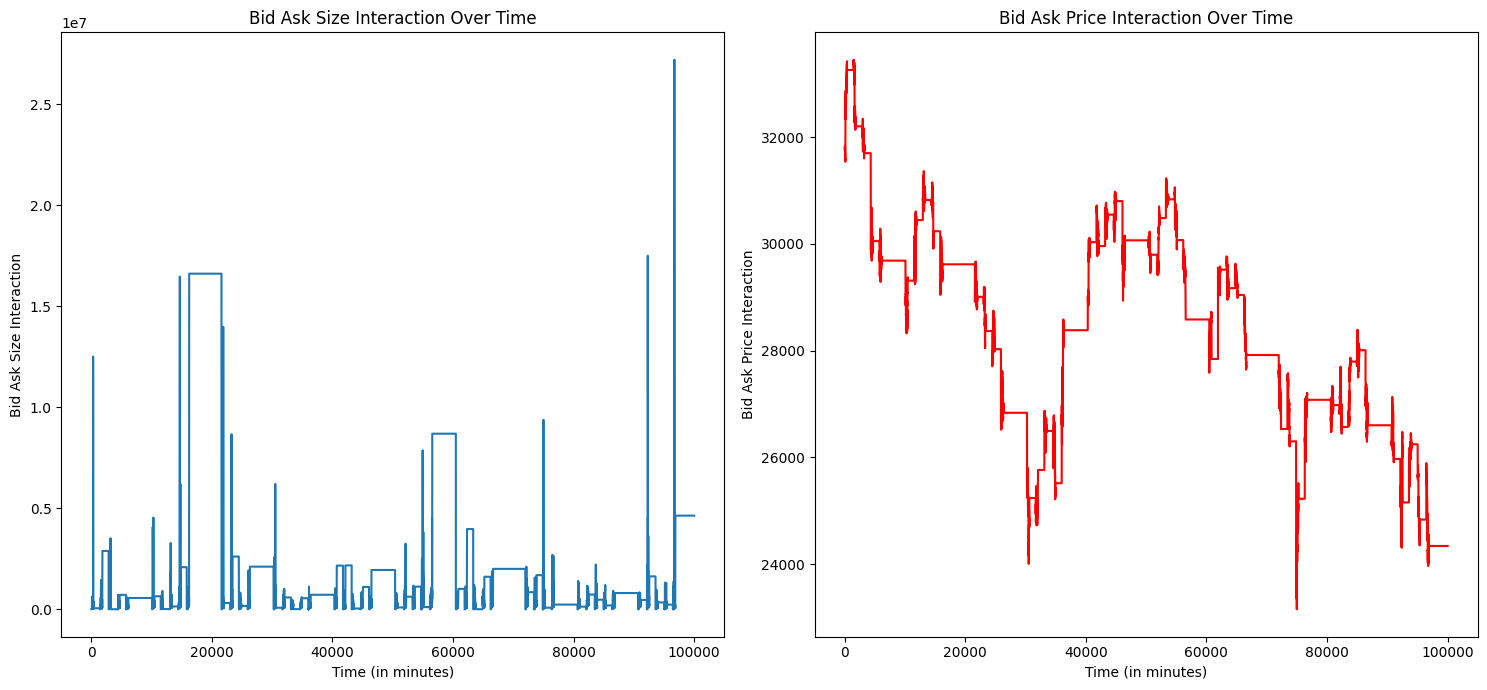

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

axes[0].plot(DL_nbbo_aapl_agg_min_2022_50000['Bid_Ask_Size_Interaction'], label='Bid_Ask_Size_Interaction')
axes[0].set_title('Bid Ask Size Interaction Over Time')
axes[0].set_xlabel('Time (in minutes)')
axes[0].set_ylabel('Bid Ask Size Interaction')

axes[1].plot(DL_nbbo_aapl_agg_min_2022_50000['Bid_Ask_Price_Interaction'], label='Bid_Ask_Price_Interaction', color='red')
axes[1].set_title('Bid Ask Price Interaction Over Time')
axes[1].set_xlabel('Time (in minutes)')
axes[1].set_ylabel('Bid Ask Price Interaction')

plt.tight_layout()
plt.show()
